In [1]:
import pandas as pd
import sys
import os
import warnings

import utils as u
import joblib

warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m'
print(f"{color}Version pandas: {pd.__version__}")

Version pandas: 2.2.3


## Loading meme data

In [2]:
gaming = pd.read_csv('../data_28/processed/gaming.csv')
ai = pd.read_csv('../data_28/processed/ai.csv')
meme = pd.read_csv('../data_28/processed/meme.csv')
rwa = pd.read_csv('../data_28/processed/rwa.csv')

gaming.shape, ai.shape, meme.shape, rwa.shape

((125654, 10), (113423, 10), (33039, 10), (52339, 10))

## Preprocessing data

In [3]:
days_to_predict = 7

In [4]:
class category_data:
    def __init__(self, train_data, series_dict, exog_dict, future_exog_dict, series_scaler, exog_scaler):
        self.train_data = train_data
        self.series_dict = series_dict
        self.exog_dict = exog_dict
        self.future_exog_dict = future_exog_dict
        self.series_scaler = series_scaler
        self.exog_scaler = exog_scaler
        self.forecaster = None
        self.predictions = None
        self.og_train = None
        self.og_pred = None
        self.error_df = None
        self.close_df = None

In [5]:
def generate_data_object(data: pd.DataFrame, days: int):
    train_data, series_dict, exog_dict, future_exog_dict, series_scaler, exog_scaler = u.preprocess_future(data, days_to_predict=days)
    data_obj = category_data(train_data, series_dict, exog_dict, future_exog_dict, series_scaler, exog_scaler)
    return data_obj

In [6]:
gaming_obj = generate_data_object(gaming, days_to_predict)
ai_obj = generate_data_object(ai, days_to_predict)
meme_obj = generate_data_object(meme, days_to_predict)
rwa_obj = generate_data_object(rwa, days_to_predict)

In [7]:
print(gaming_obj.train_data['id'].nunique())
print(ai_obj.train_data['id'].nunique())
print(meme_obj.train_data['id'].nunique())
print(rwa_obj.train_data['id'].nunique())

56
31
18
16


In [9]:
gaming_obj.forecaster = u.train_forecaster(gaming_obj.series_dict, gaming_obj.exog_dict)
ai_obj.forecaster = u.train_forecaster(ai_obj.series_dict, ai_obj.exog_dict)
meme_obj.forecaster = u.train_forecaster(meme_obj.series_dict, meme_obj.exog_dict)
rwa_obj.forecaster = u.train_forecaster(rwa_obj.series_dict, rwa_obj.exog_dict)

{'loss_function': 'RMSE', 'silent': True, 'max_depth': 5, 'random_state': 123}
{'loss_function': 'RMSE', 'silent': True, 'max_depth': 5, 'random_state': 123}
{'loss_function': 'RMSE', 'silent': True, 'max_depth': 5, 'random_state': 123}
{'loss_function': 'RMSE', 'silent': True, 'max_depth': 5, 'random_state': 123}


In [10]:
gaming_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=gaming_obj.forecaster, future_exog_dict=gaming_obj.future_exog_dict)
ai_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=ai_obj.forecaster, future_exog_dict=ai_obj.future_exog_dict)
meme_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=meme_obj.forecaster, future_exog_dict=meme_obj.future_exog_dict)
rwa_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=rwa_obj.forecaster, future_exog_dict=rwa_obj.future_exog_dict)

In [11]:
gaming_obj.og_train, gaming_obj.og_pred = u.inverse_scaling_future(train_df=gaming_obj.train_data, pred_df=gaming_obj.predictions, scalers=gaming_obj.series_scaler)
ai_obj.og_train, ai_obj.og_pred = u.inverse_scaling_future(train_df=ai_obj.train_data, pred_df=ai_obj.predictions, scalers=ai_obj.series_scaler)
meme_obj.og_train, meme_obj.og_pred = u.inverse_scaling_future(train_df=meme_obj.train_data, pred_df=meme_obj.predictions, scalers=meme_obj.series_scaler)
rwa_obj.og_train, rwa_obj.og_pred = u.inverse_scaling_future(train_df=rwa_obj.train_data, pred_df=rwa_obj.predictions, scalers=rwa_obj.series_scaler)

In [27]:
meme_obj.og_train[meme_obj.og_train['symbol'] == "LOWB"].tail()

timestamp      open      high       low     close       volume  \
20712 2024-10-11  0.000004  0.000006  0.000004  0.000006  2469.534582   
20713 2024-10-12  0.000004  0.000007  0.000004  0.000006  1448.287245   
20714 2024-10-13  0.000004  0.000004  0.000004  0.000004  1289.247826   
20715 2024-10-14  0.000004  0.000007  0.000004  0.000007  1301.522000   
20716 2024-10-15  0.000007  0.000007  0.000004  0.000004  2225.290594   

             name symbol                                    id category  \
20712  Loser Coin   LOWB  c16cce0c-f968-4df0-9165-d790336bef6f     meme   
20713  Loser Coin   LOWB  c16cce0c-f968-4df0-9165-d790336bef6f     meme   
20714  Loser Coin   LOWB  c16cce0c-f968-4df0-9165-d790336bef6f     meme   
20715  Loser Coin   LOWB  c16cce0c-f968-4df0-9165-d790336bef6f     meme   
20716  Loser Coin   LOWB  c16cce0c-f968-4df0-9165-d790336bef6f     meme   

       days_until_halving  
20712            1.444700  
20713            1.442294  
20714            1.439888  
20715            1.437482  
20716            1.435076

In [28]:
meme_obj.og_pred["c16cce0c-f968-4df0-9165-d790336bef6f"]

2024-10-16    0.000006
2024-10-17    0.000006
2024-10-18    0.000006
2024-10-19    0.000006
2024-10-20    0.000007
2024-10-21    0.000007
2024-10-22    0.000008
Freq: D, Name: c16cce0c-f968-4df0-9165-d790336bef6f, dtype: float64

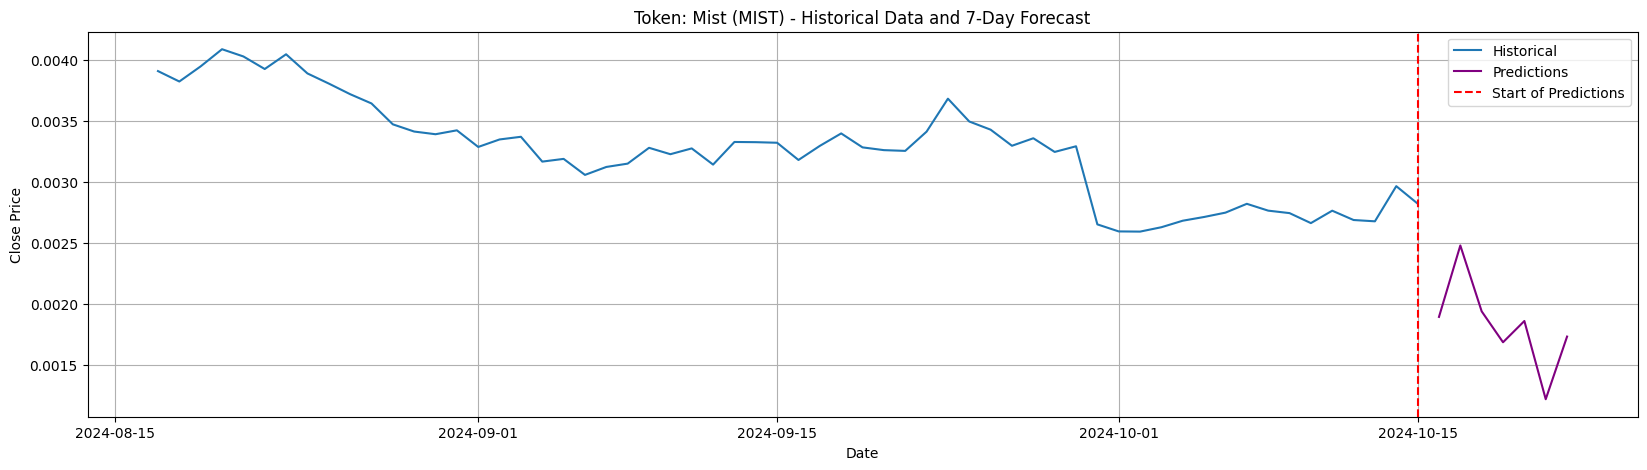

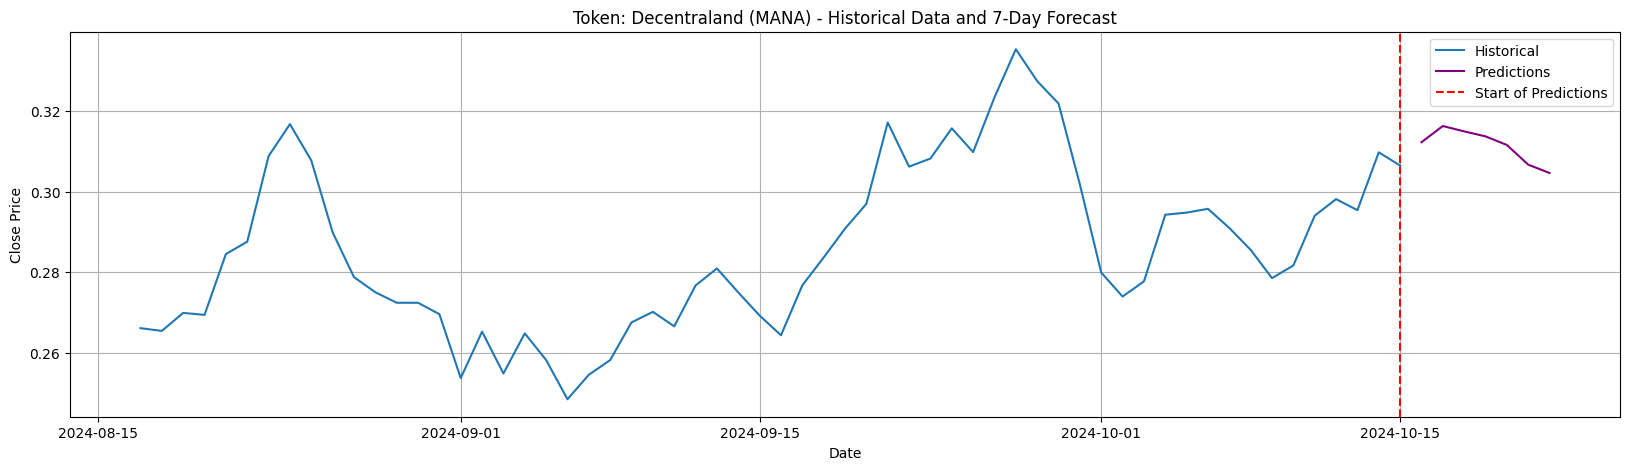

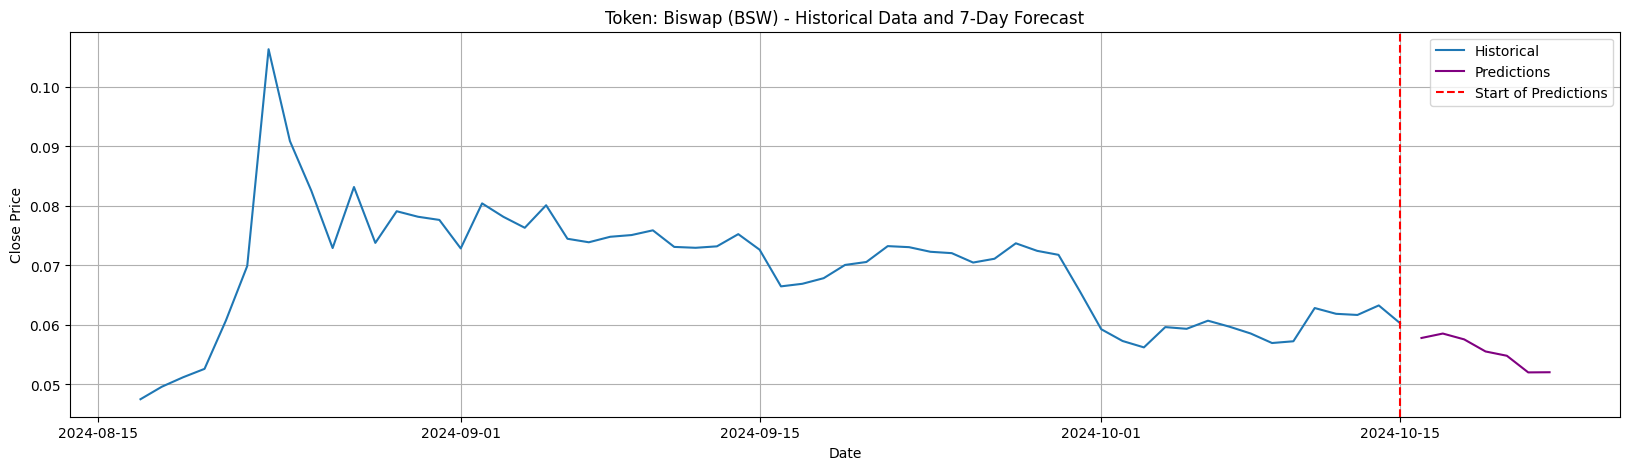

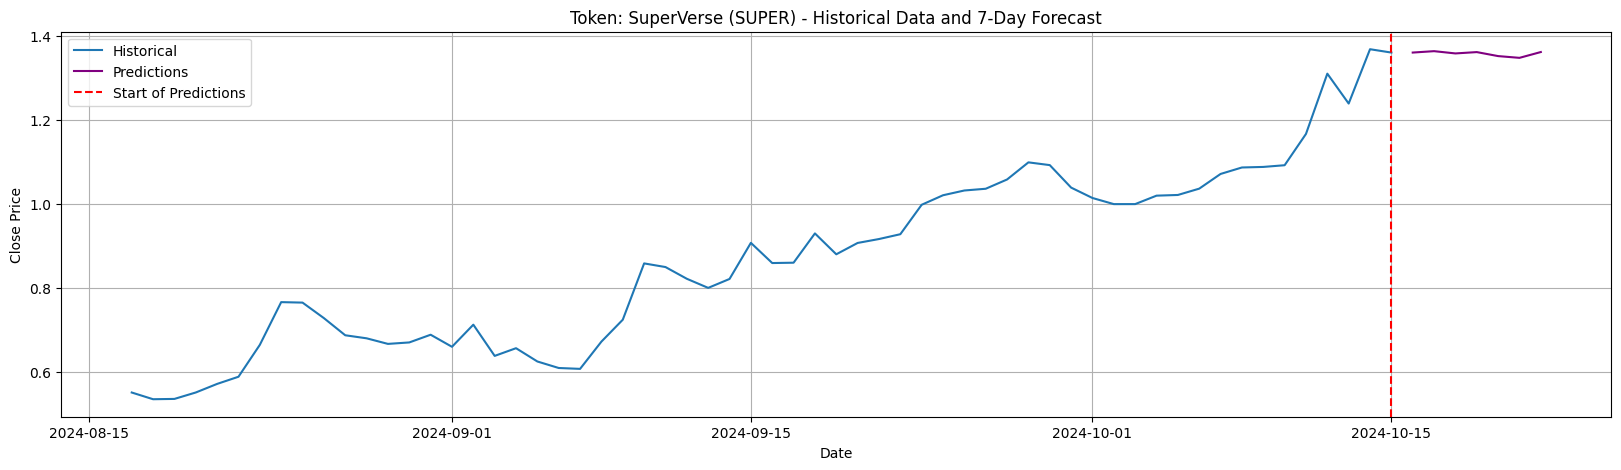

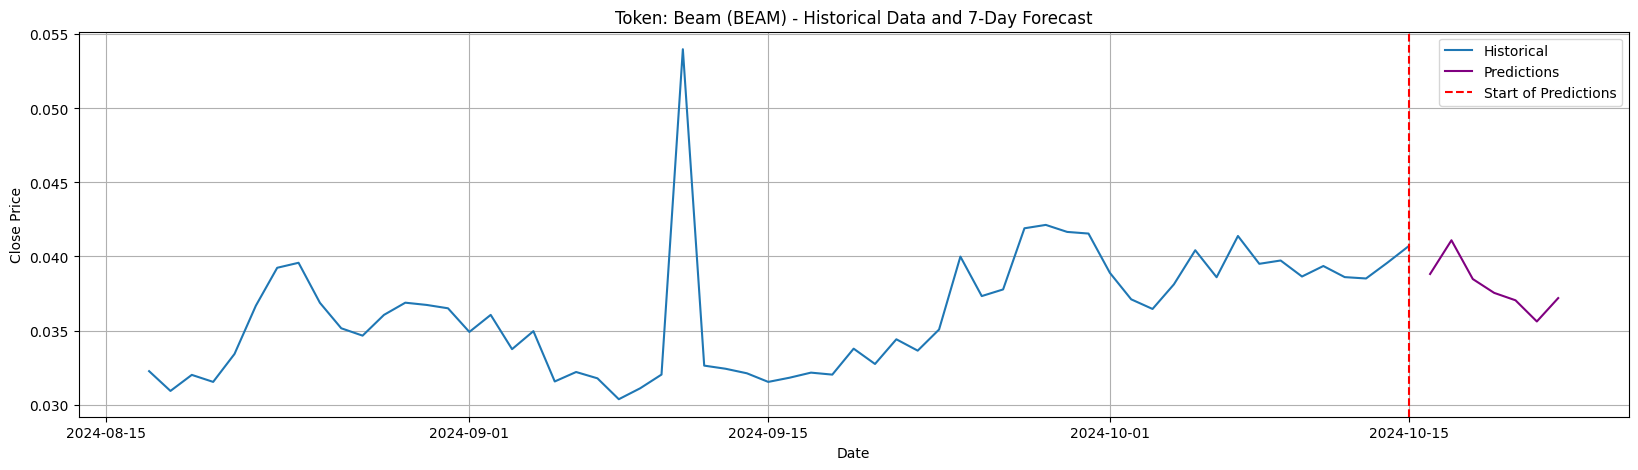

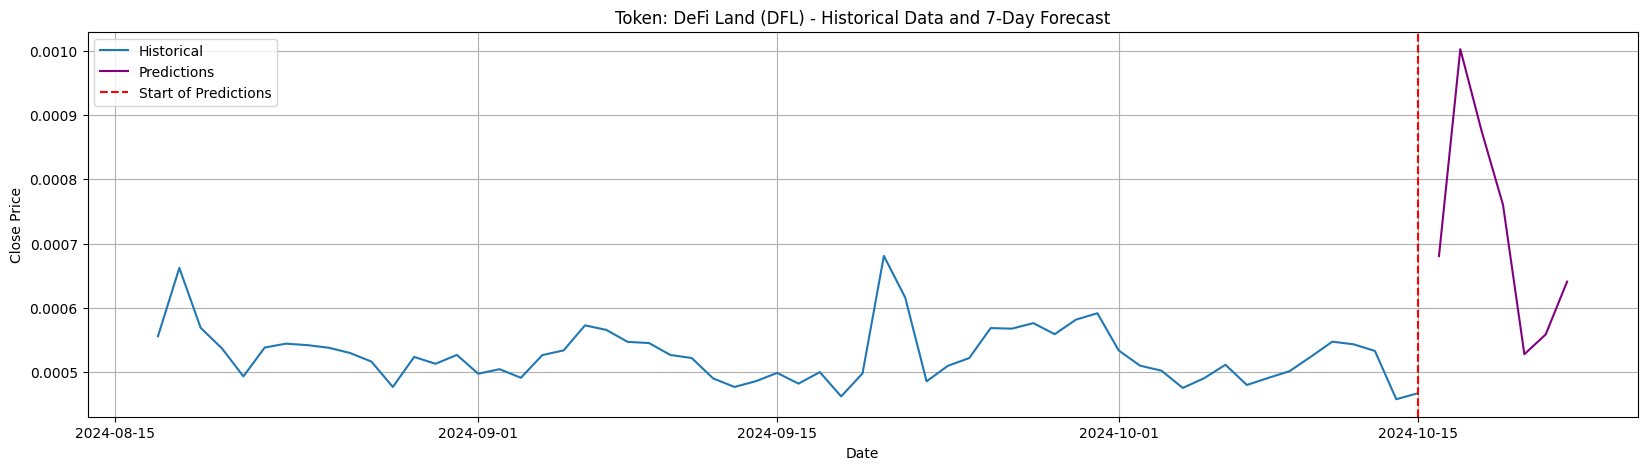

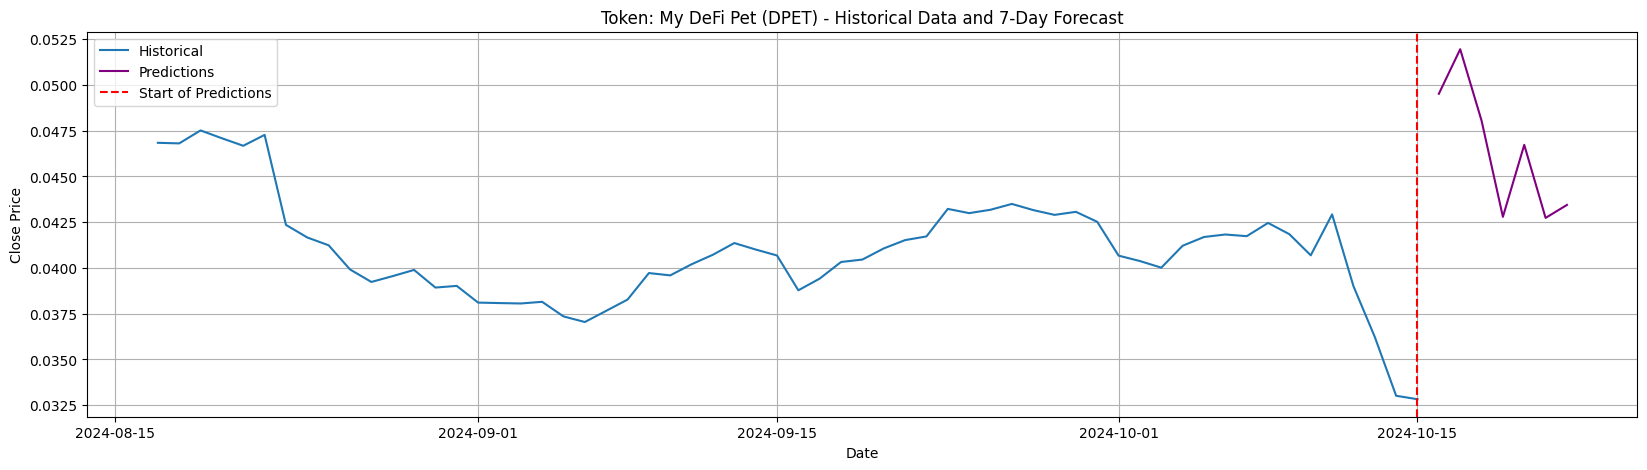

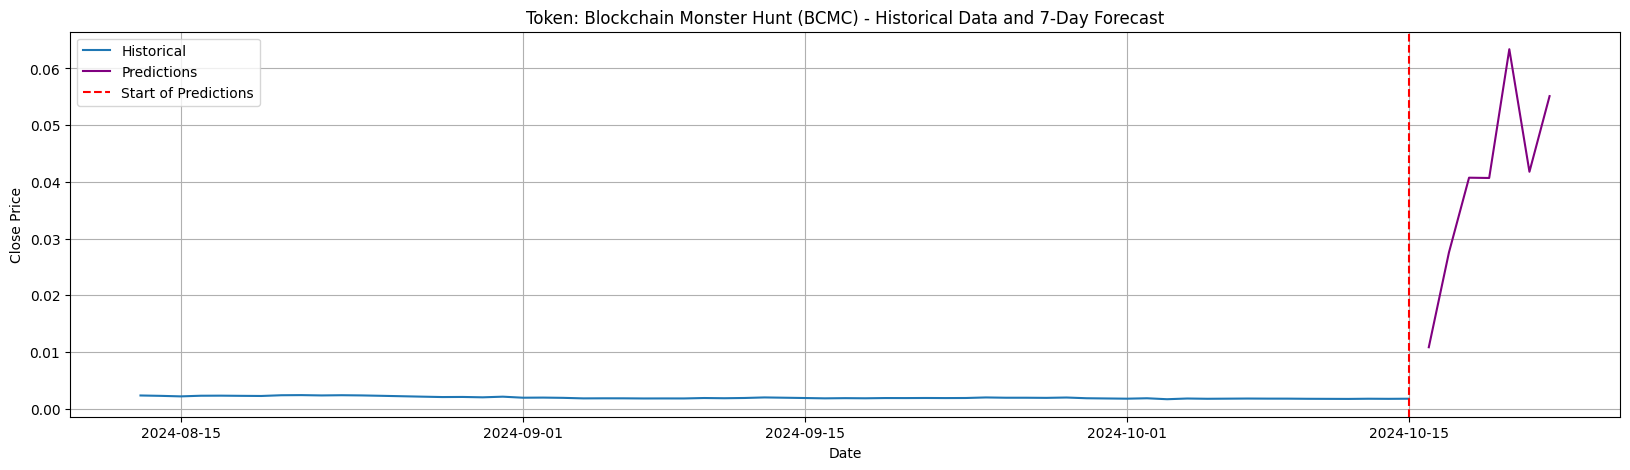

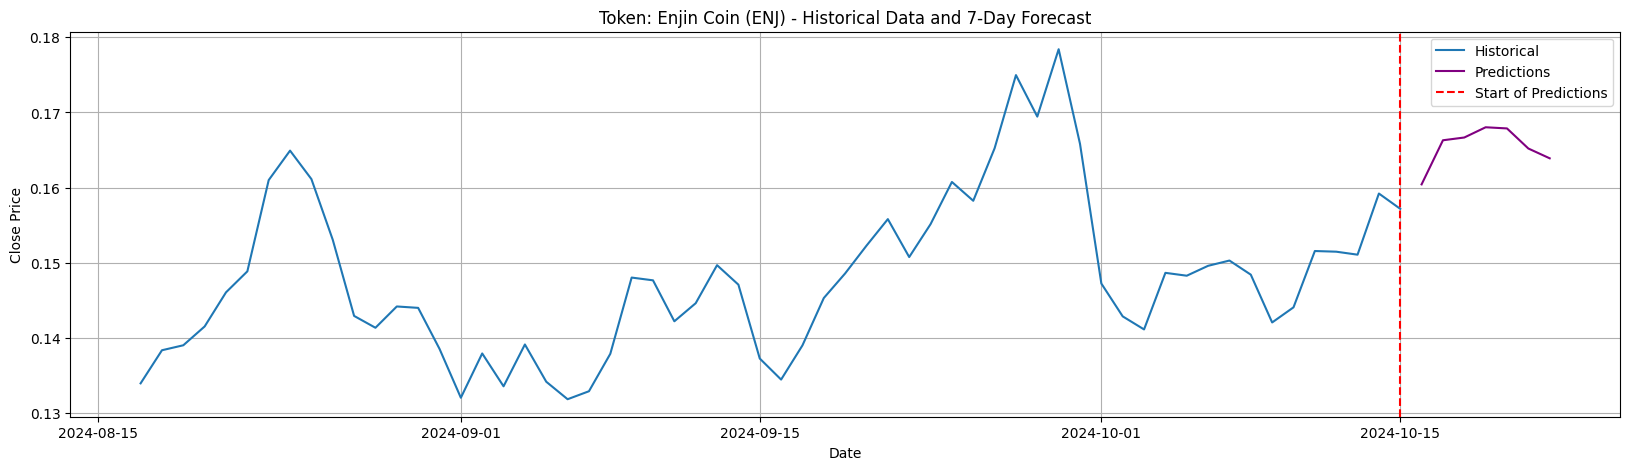

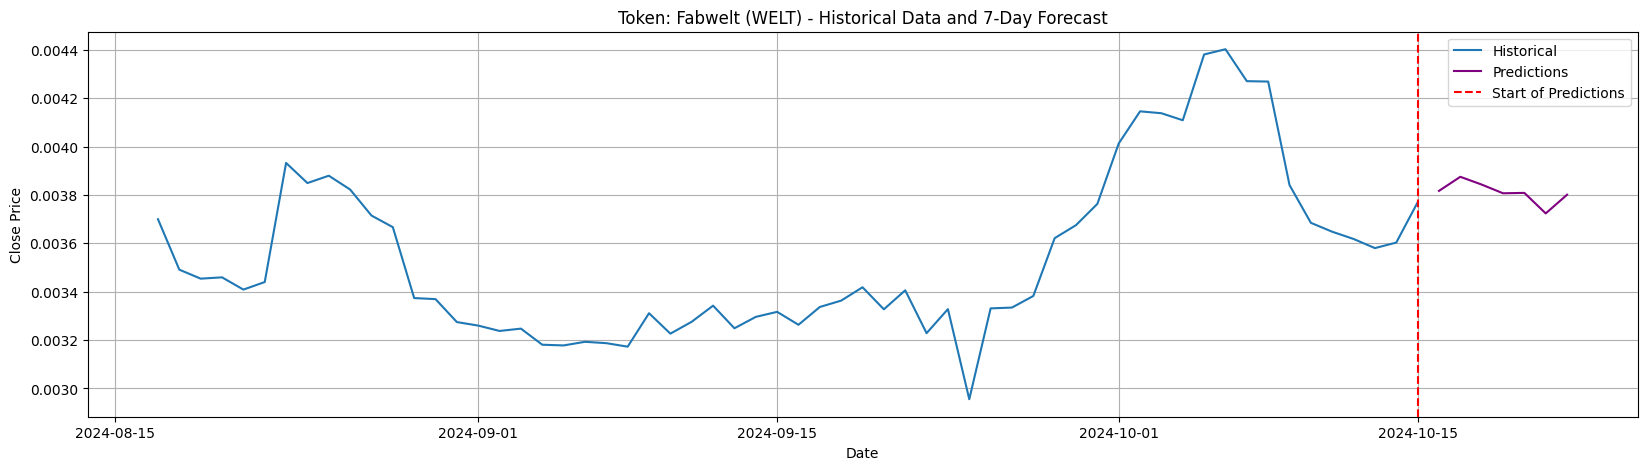

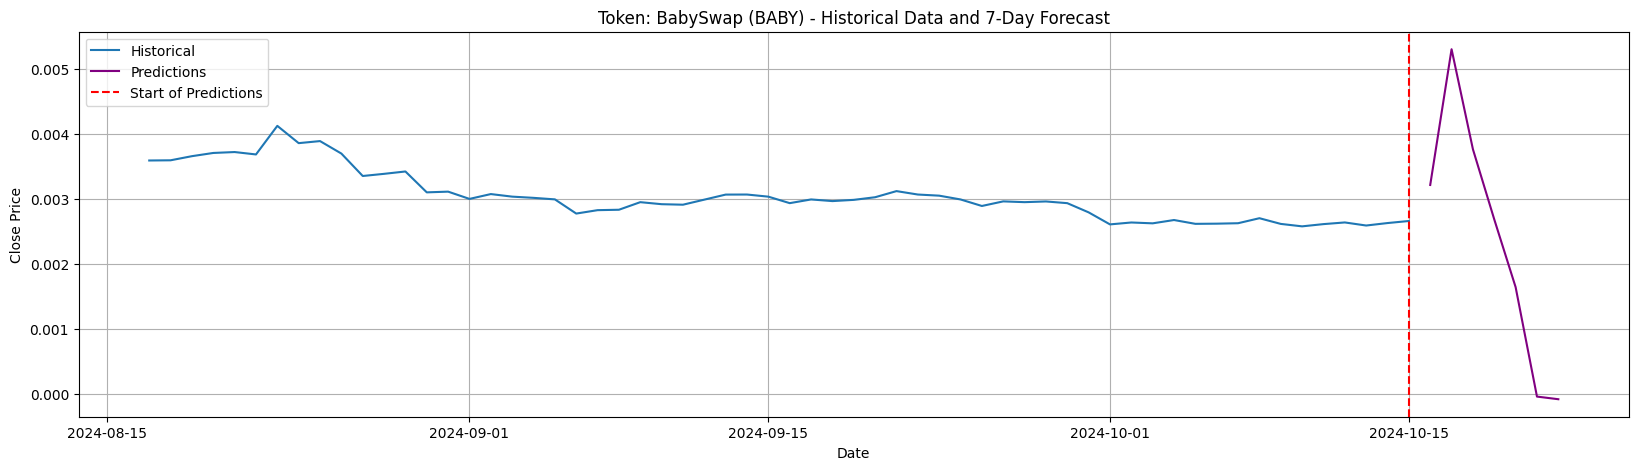

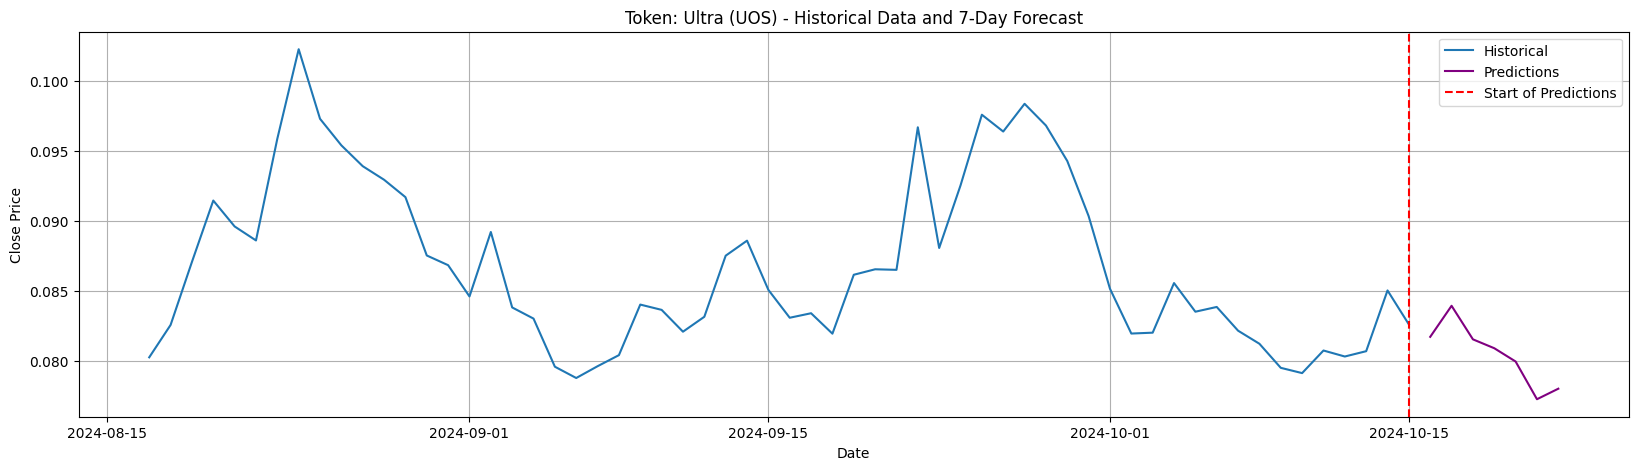

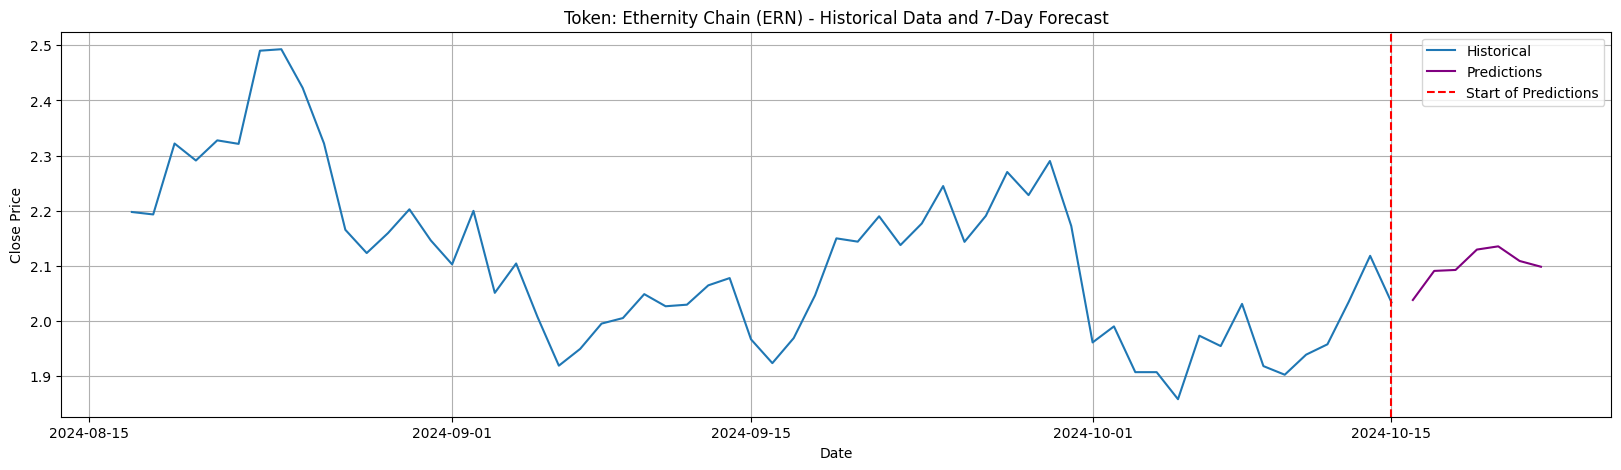

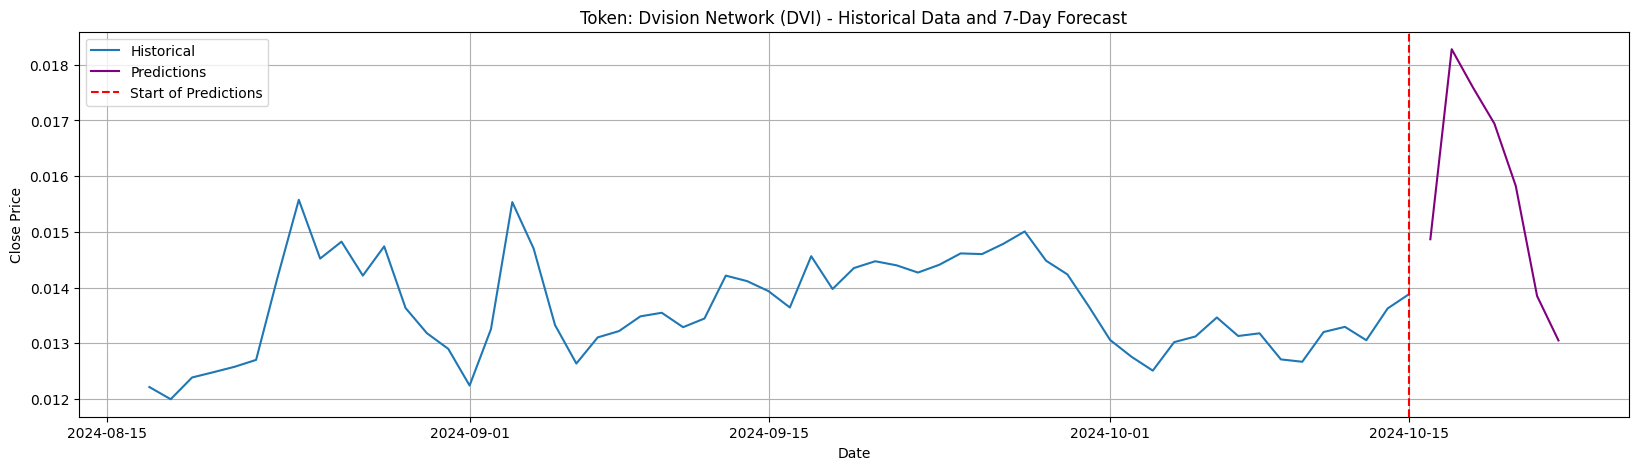

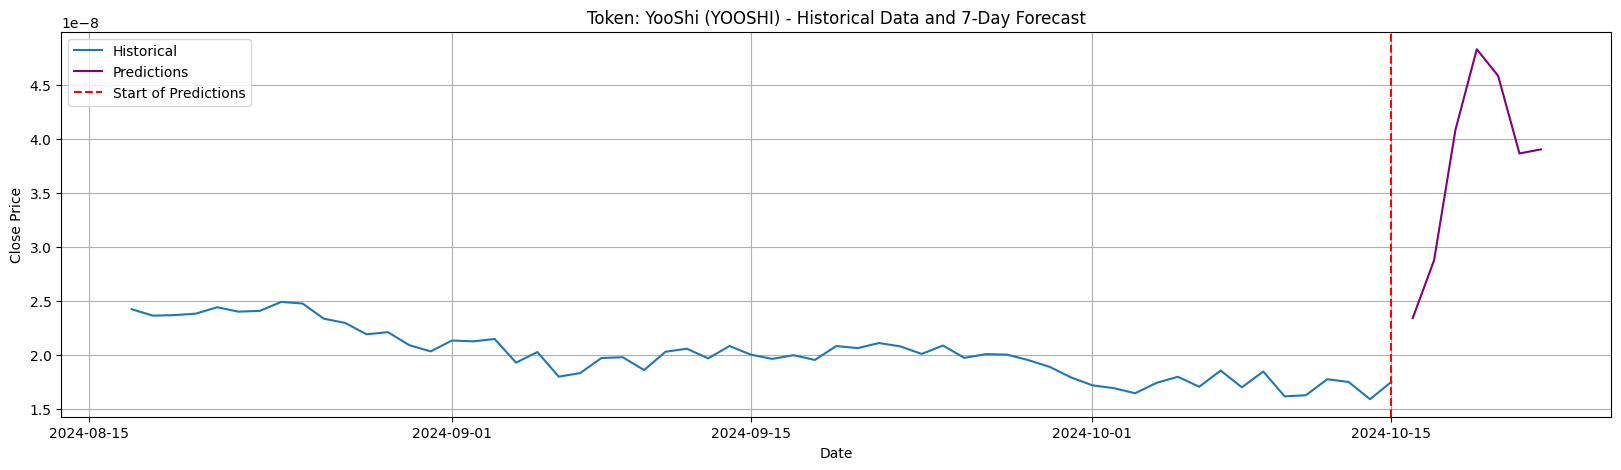

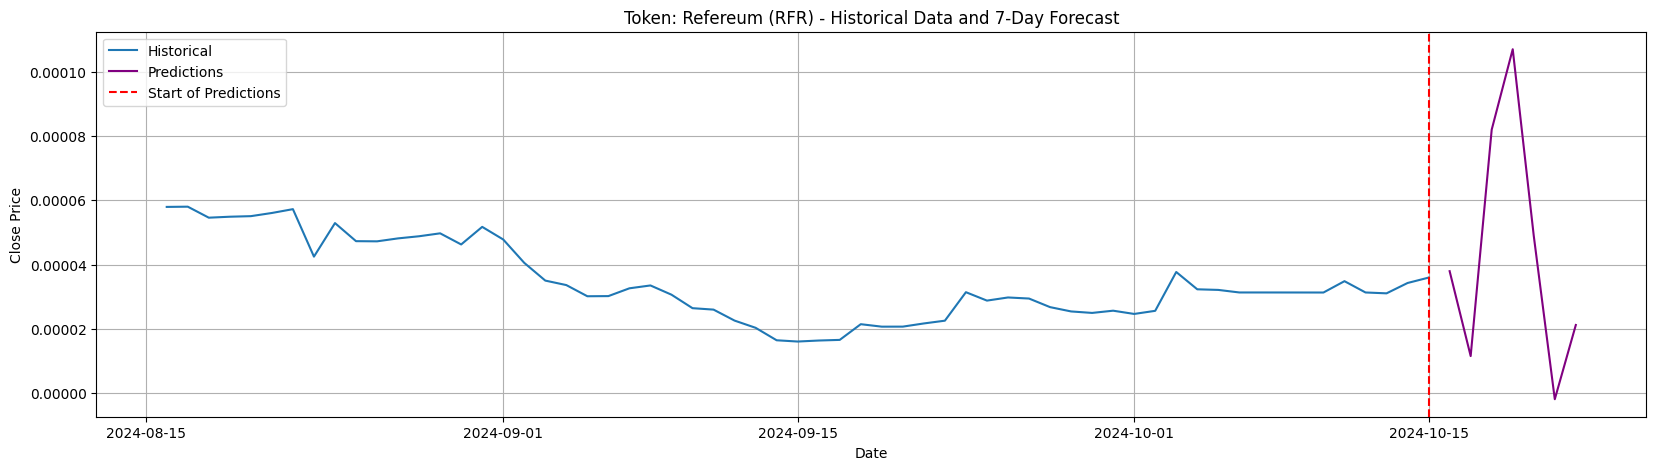

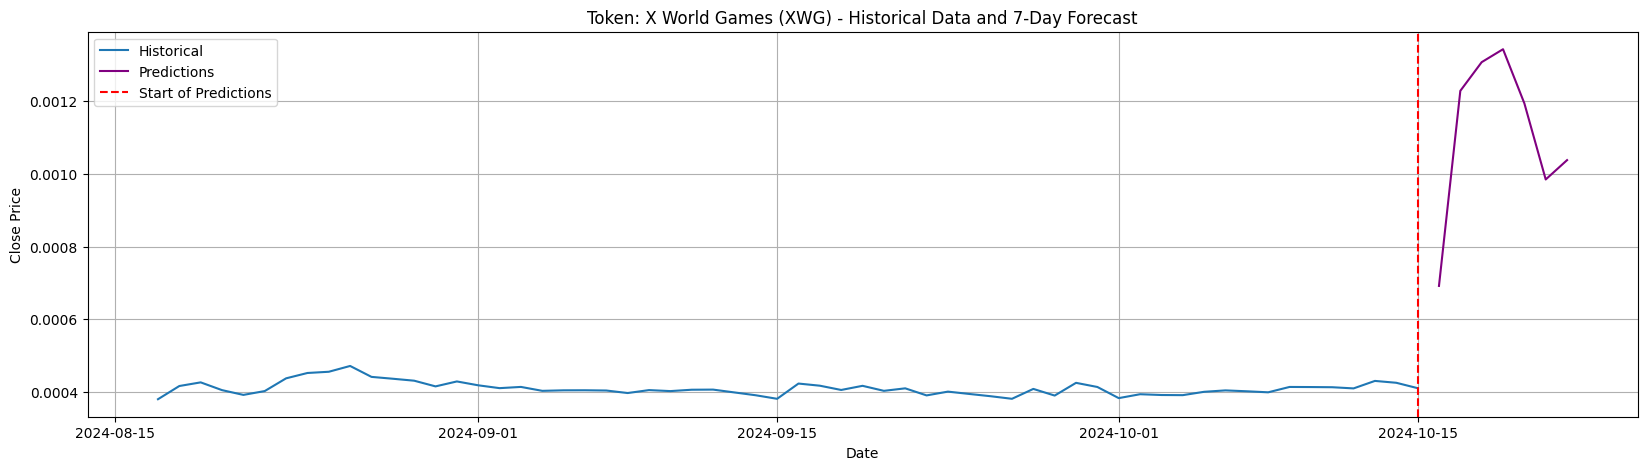

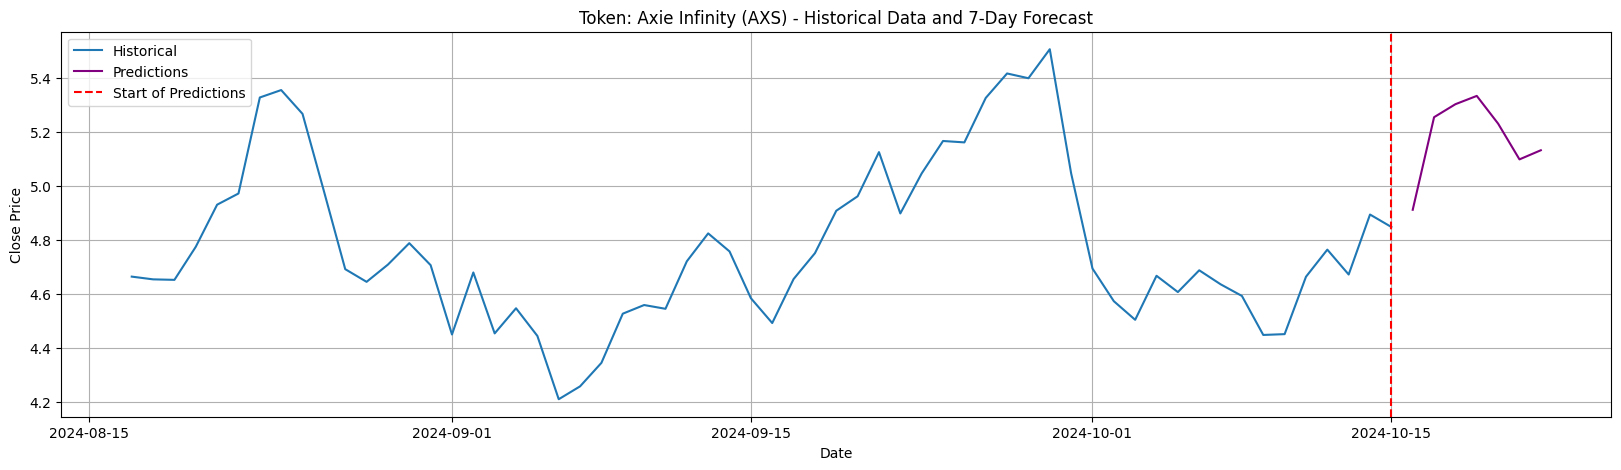

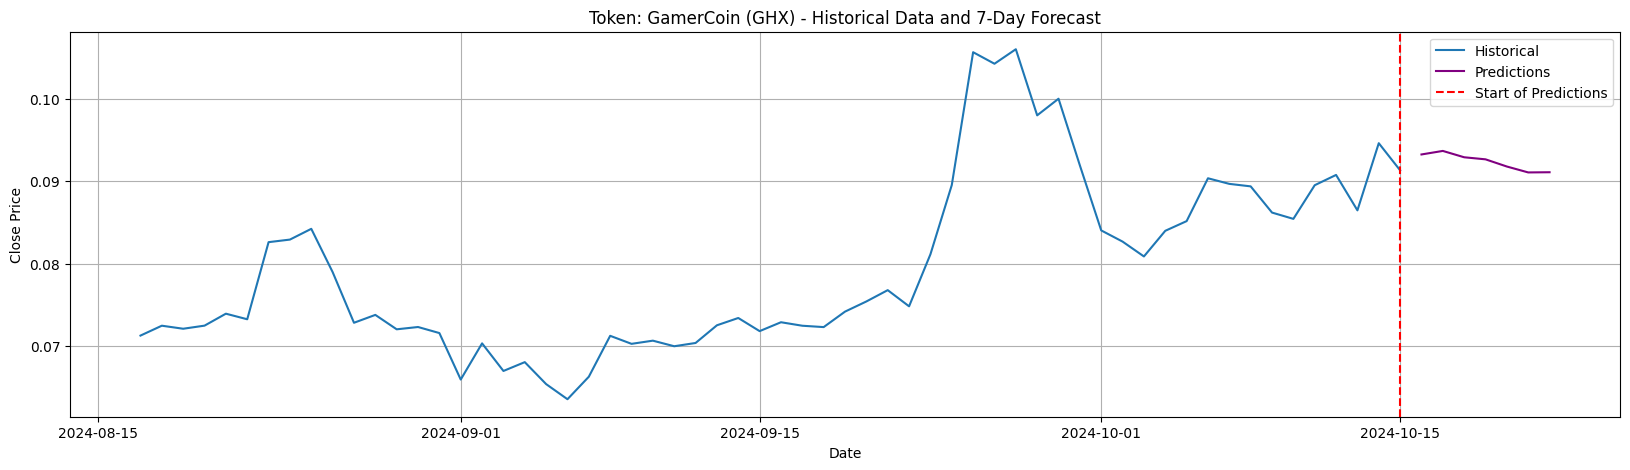

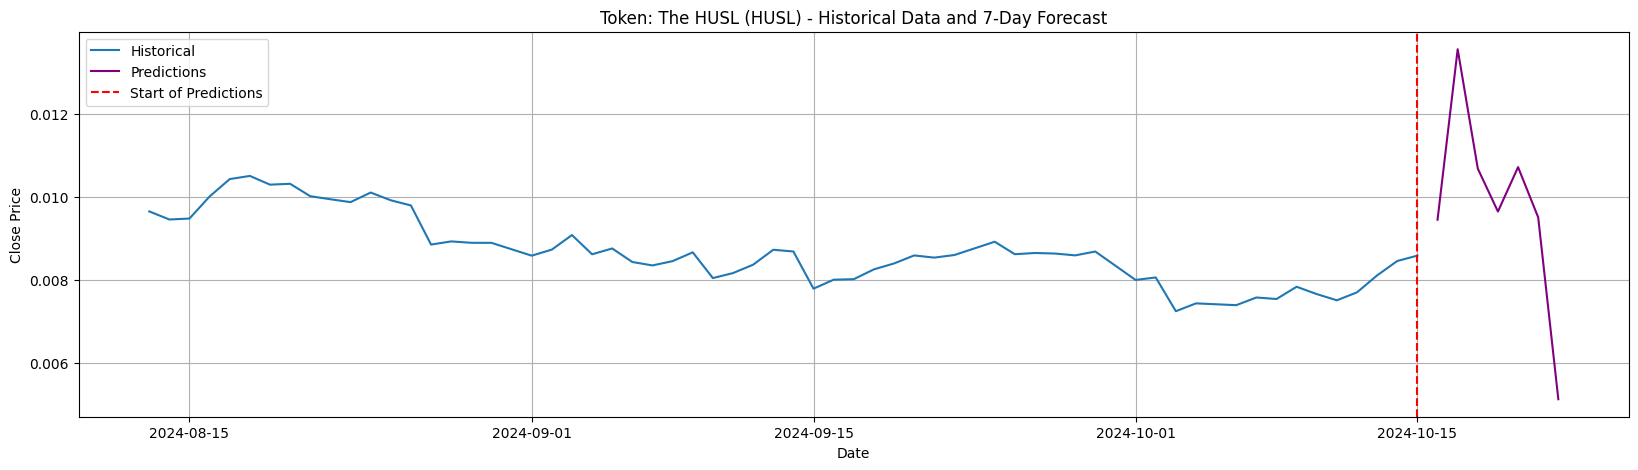

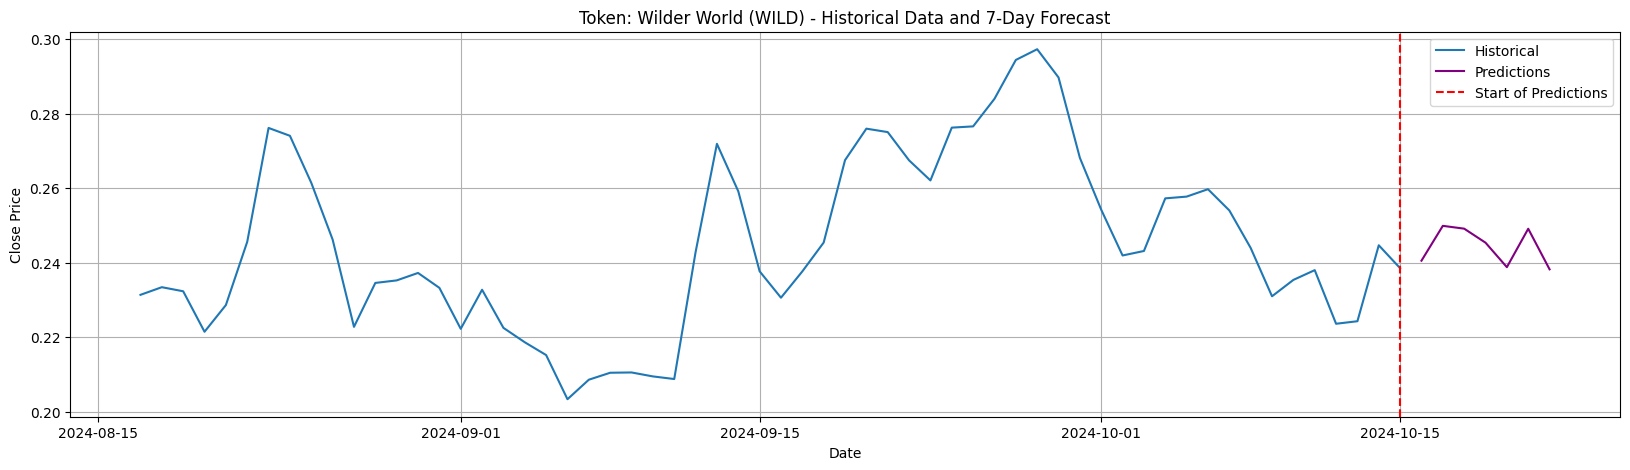

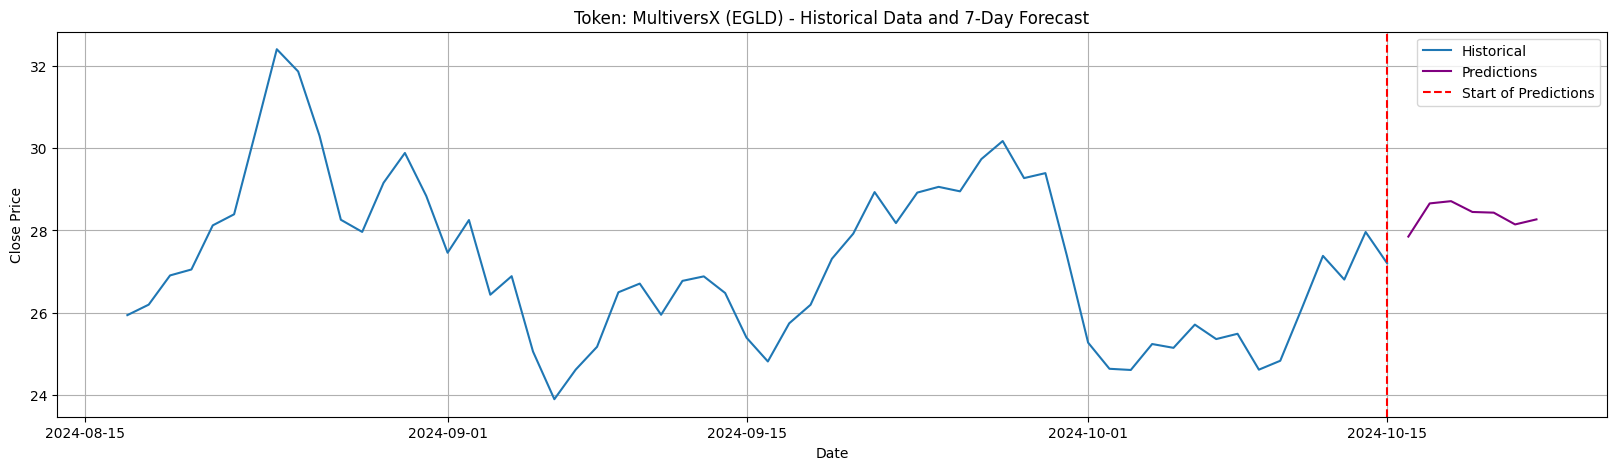

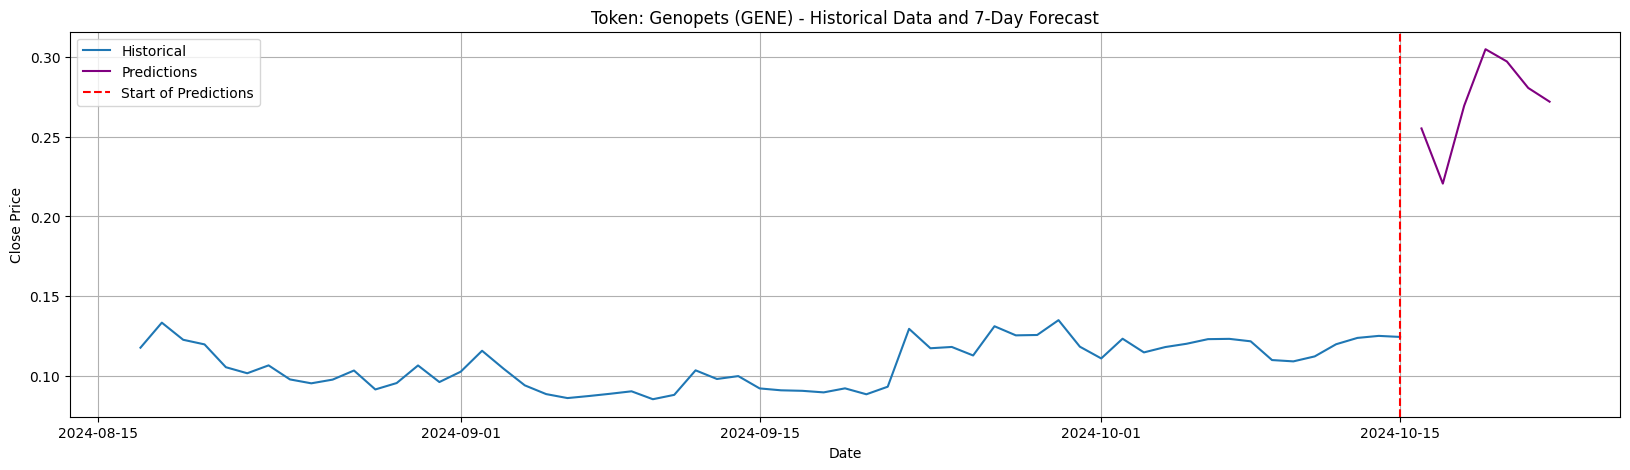

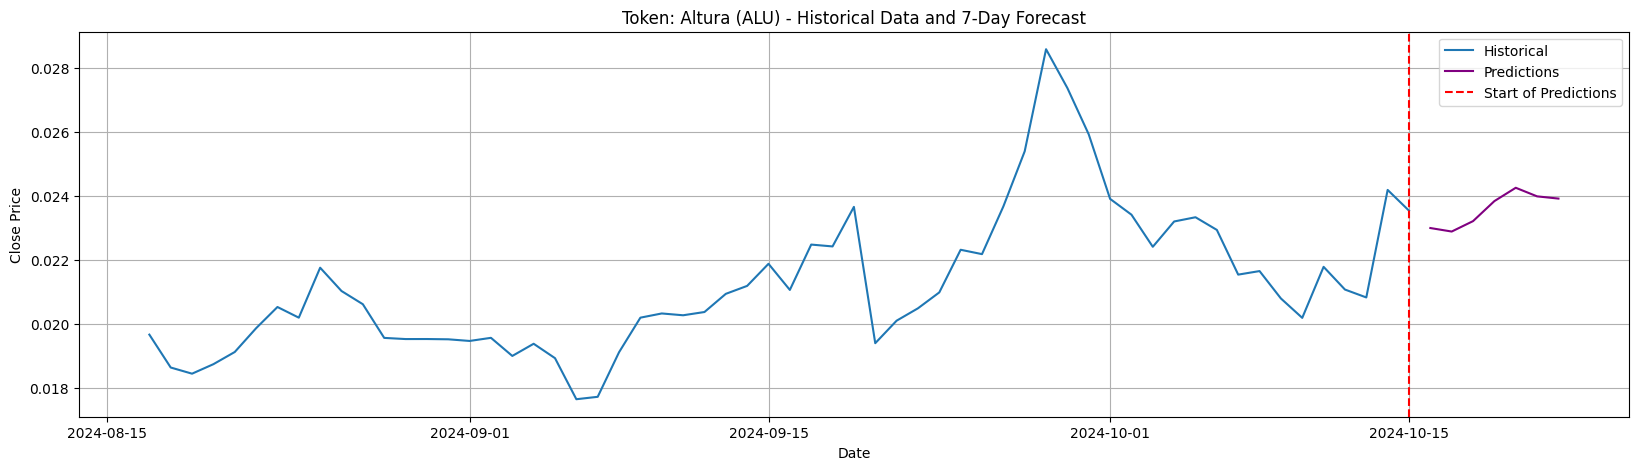

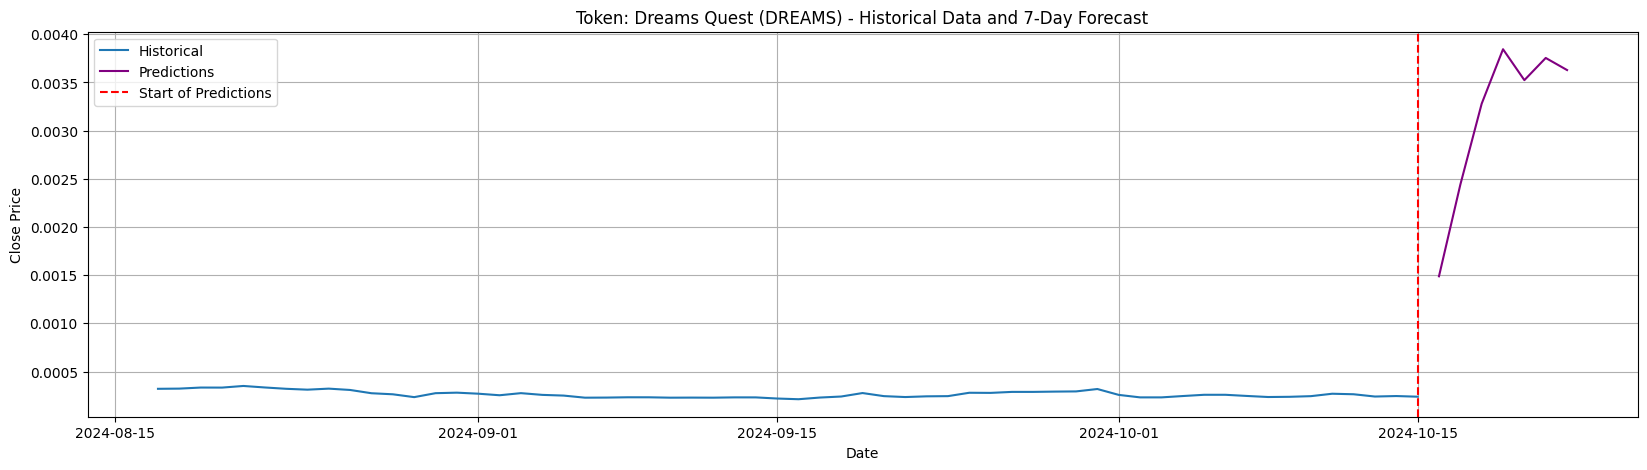

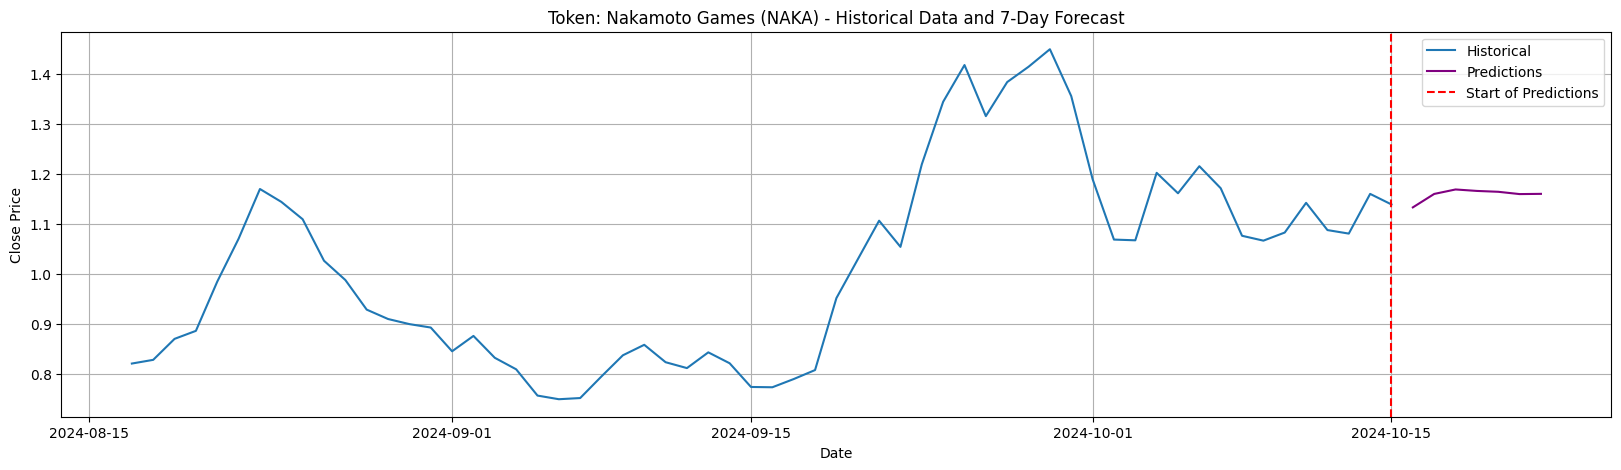

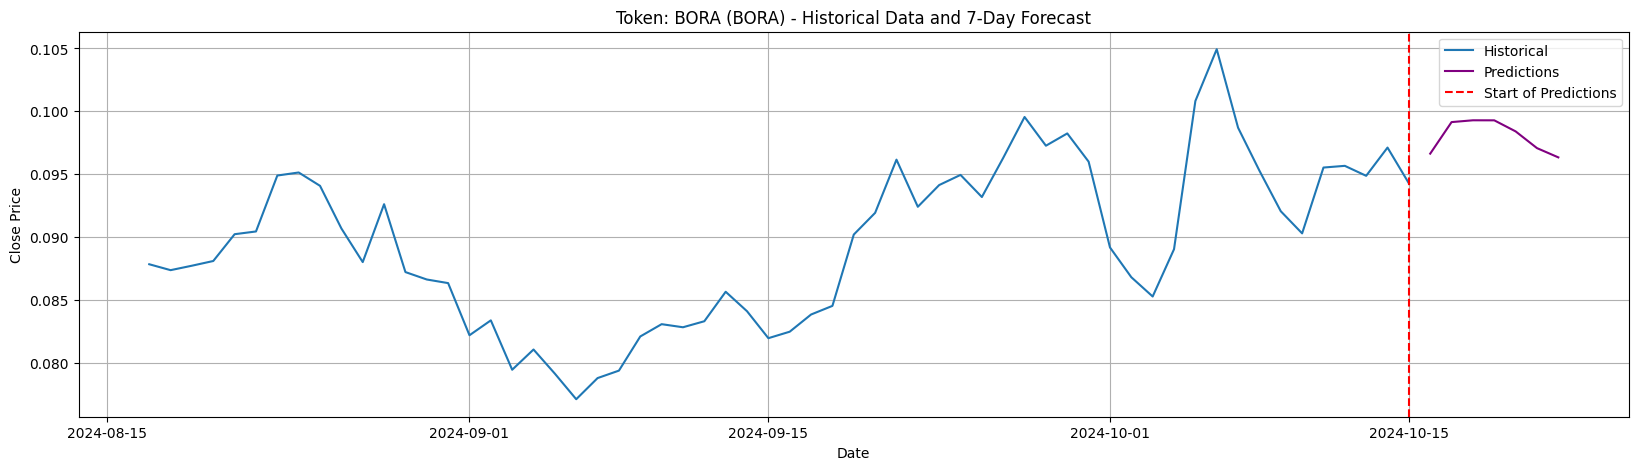

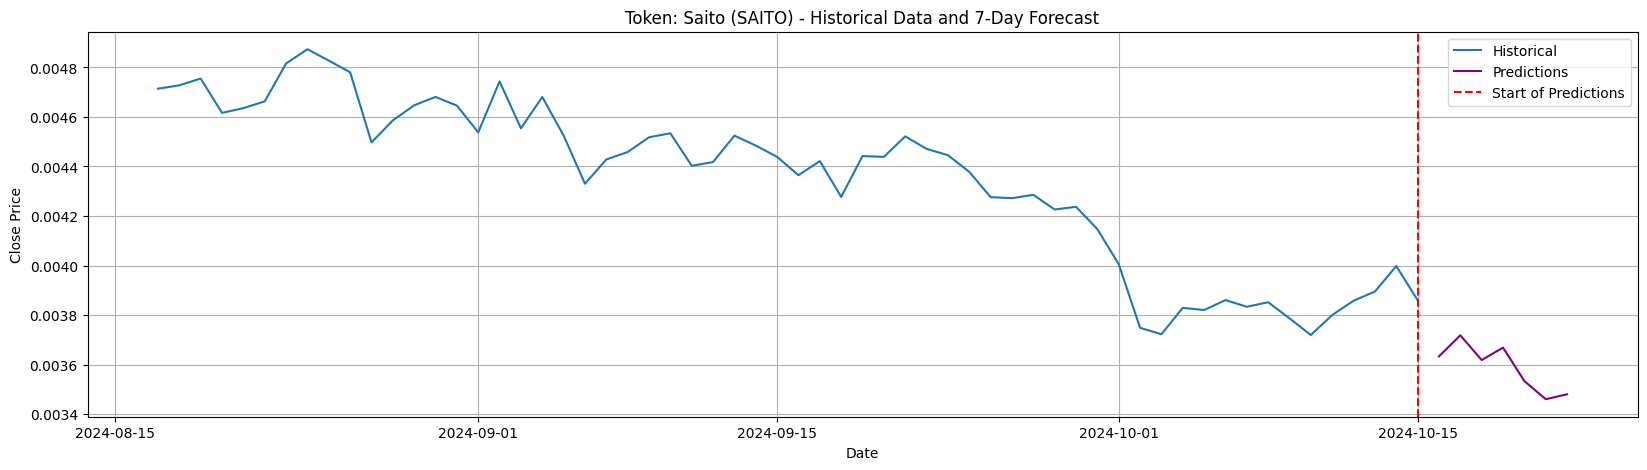

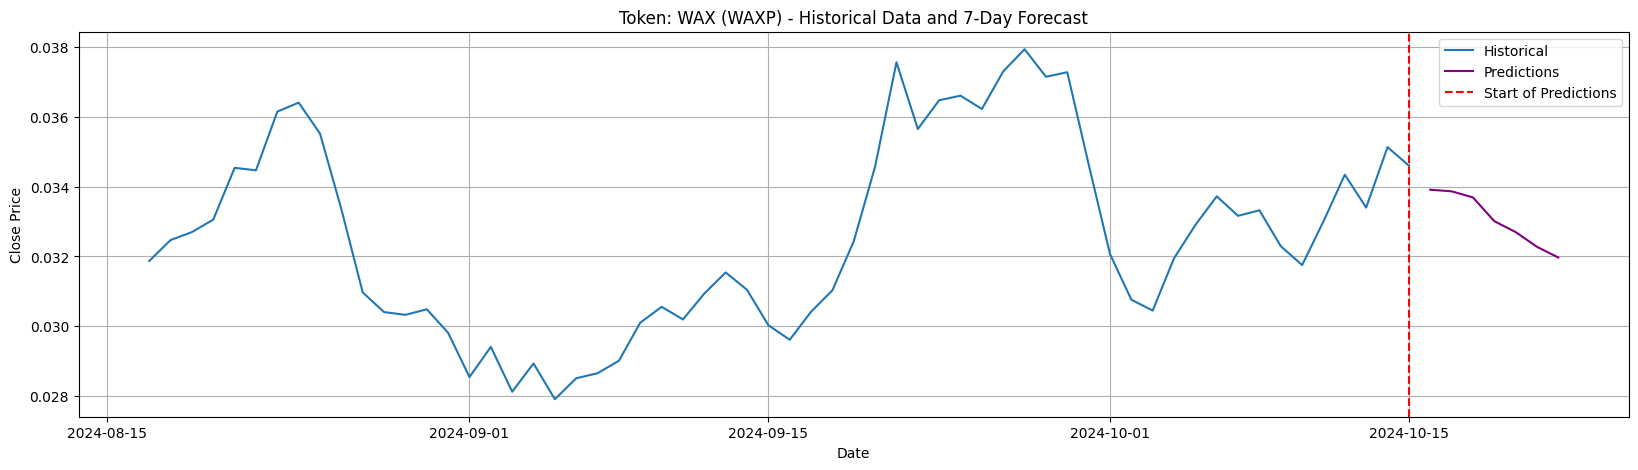

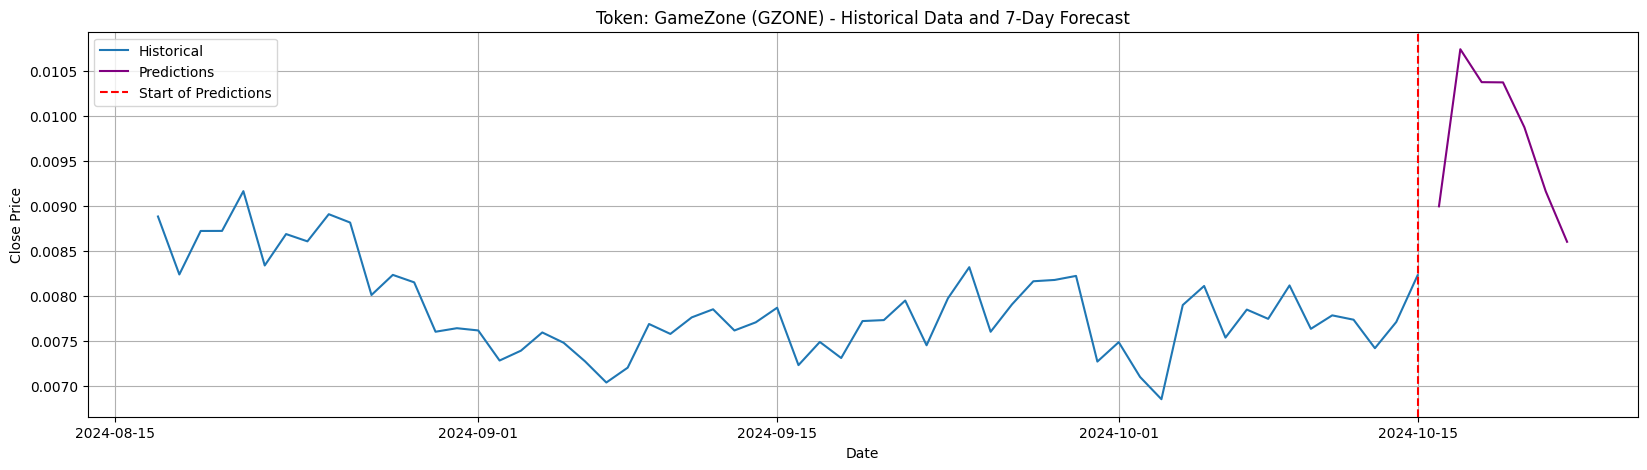

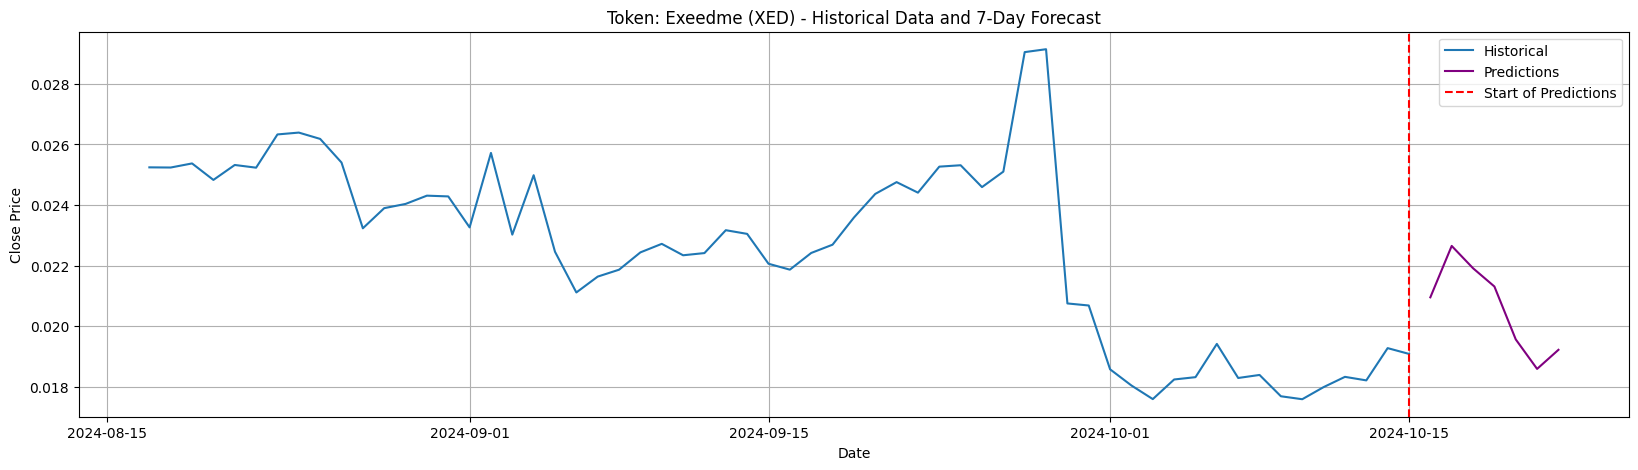

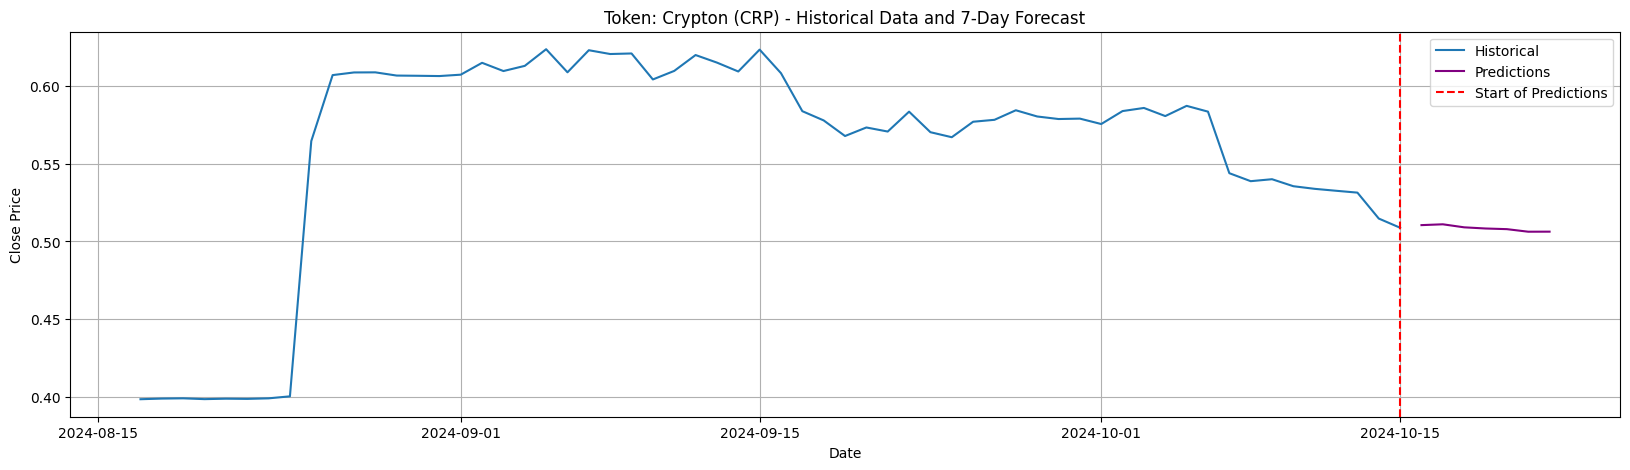

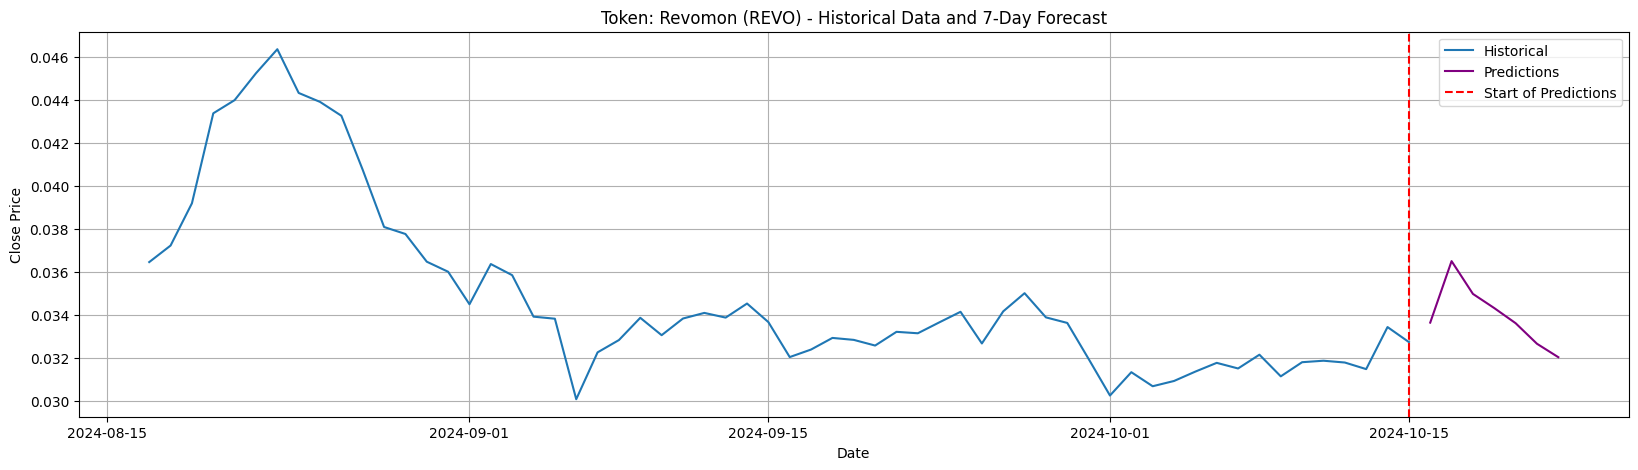

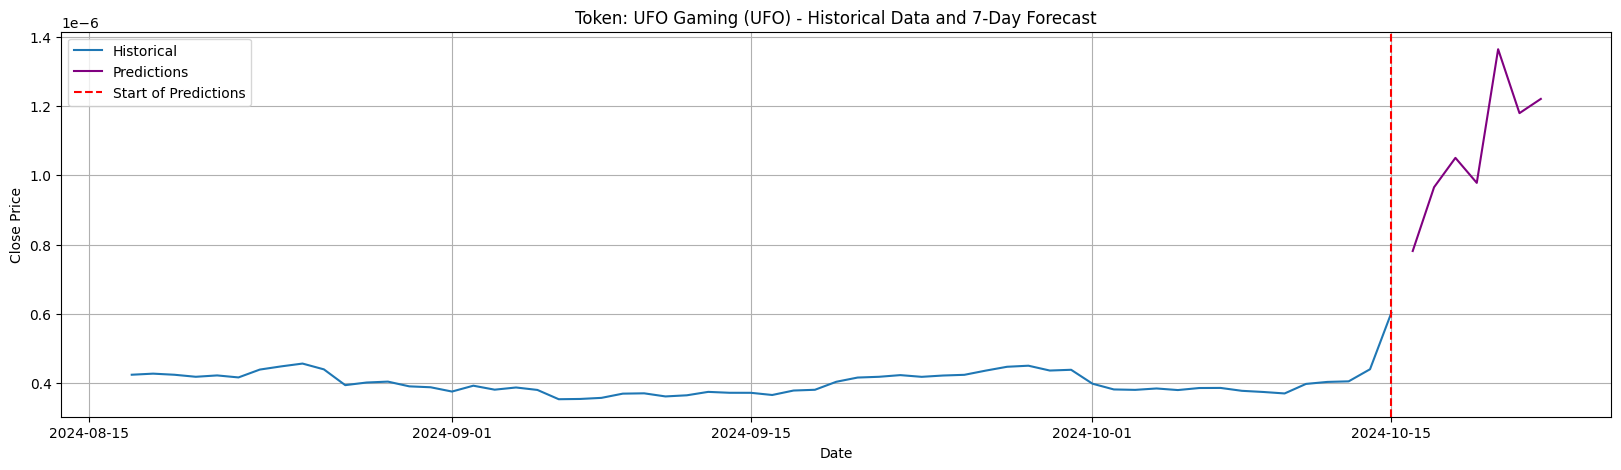

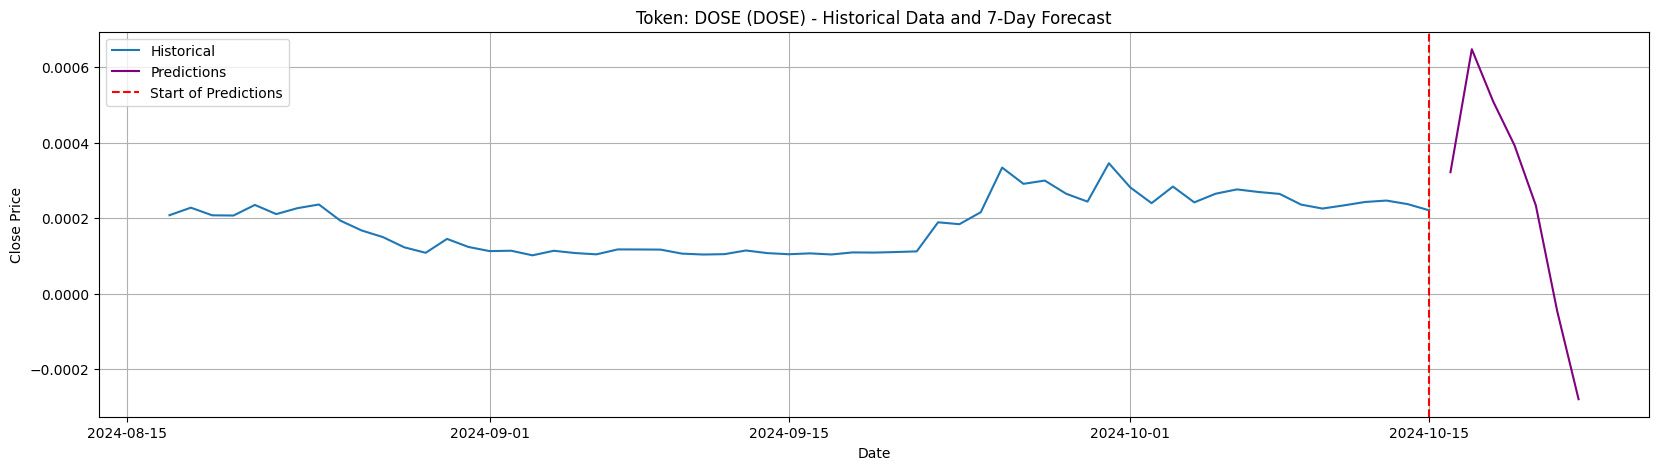

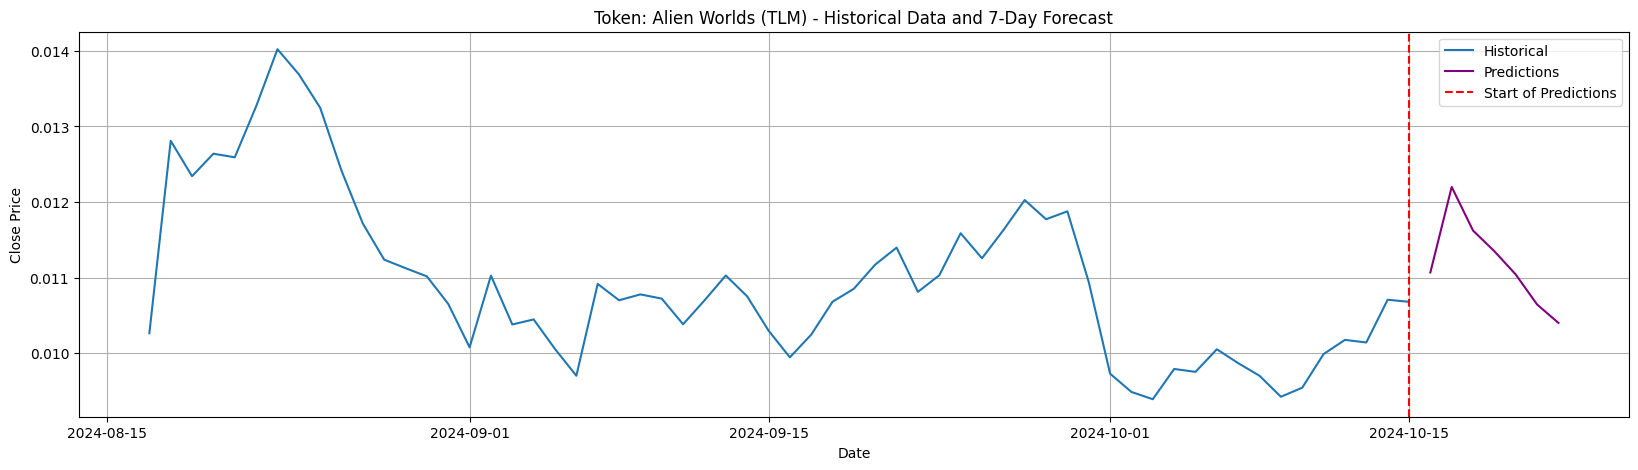

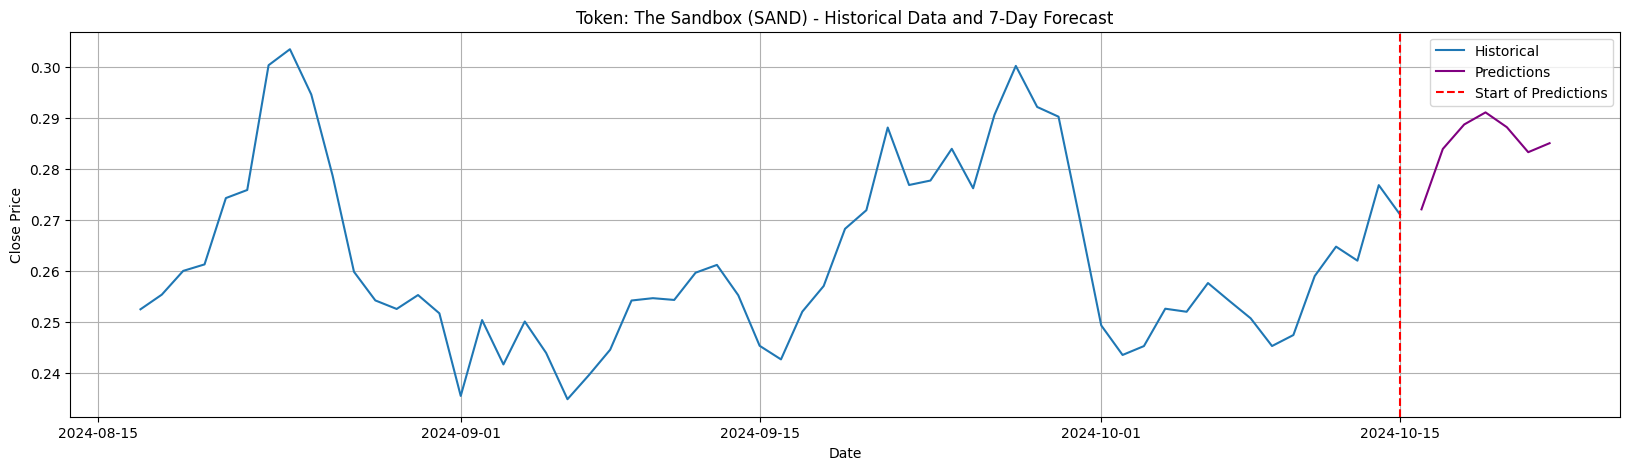

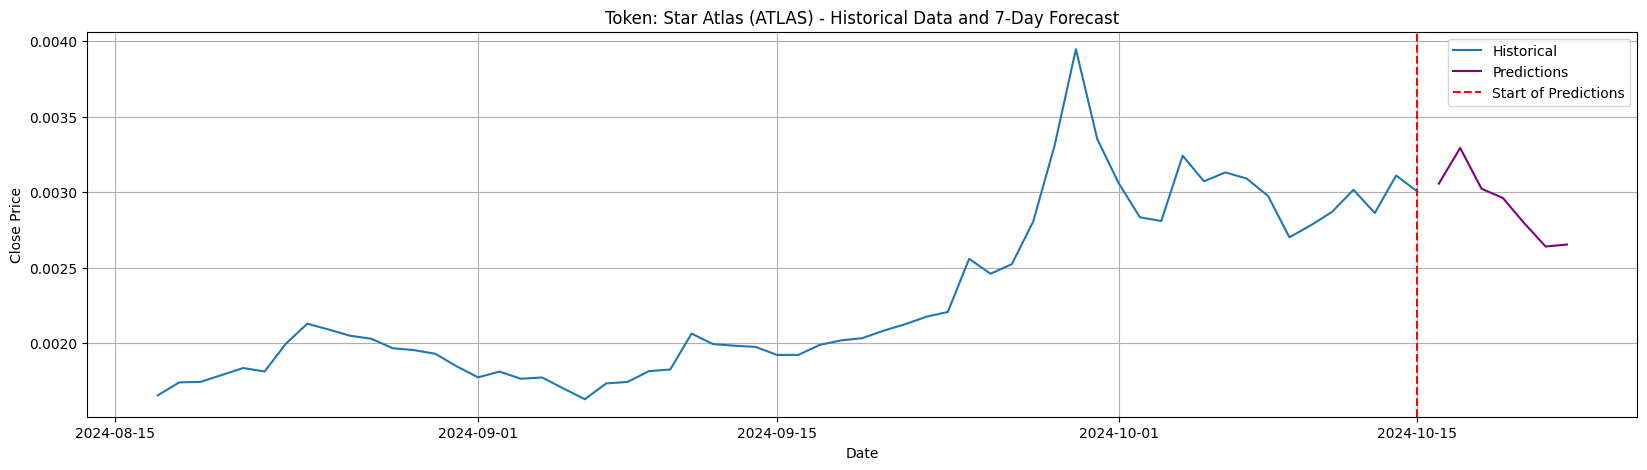

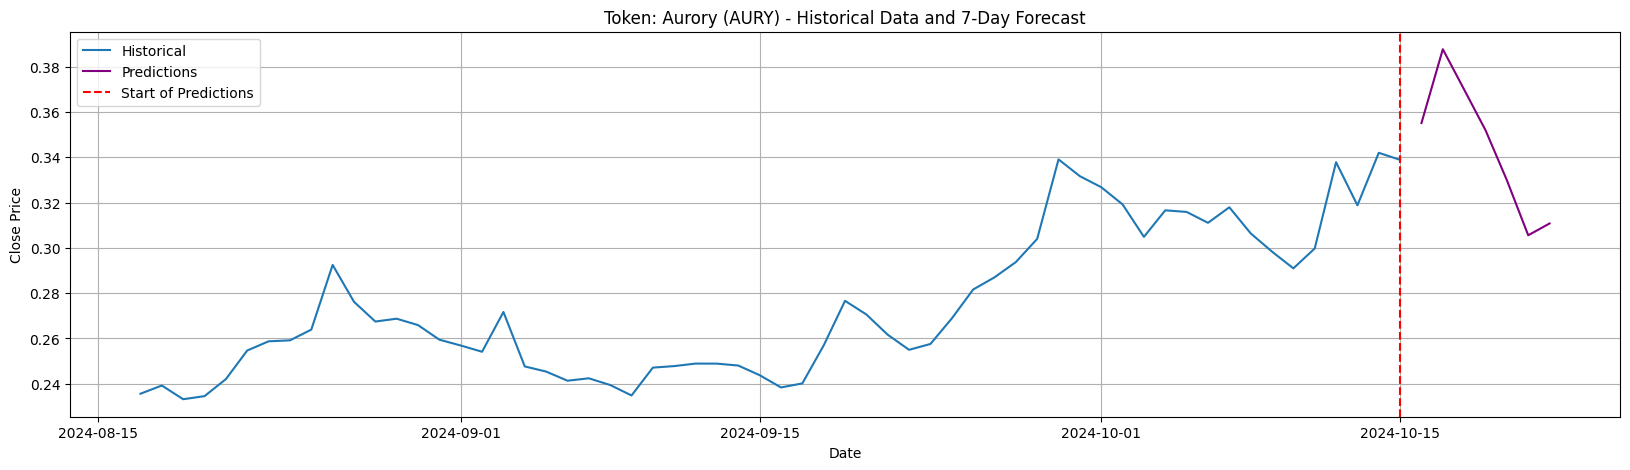

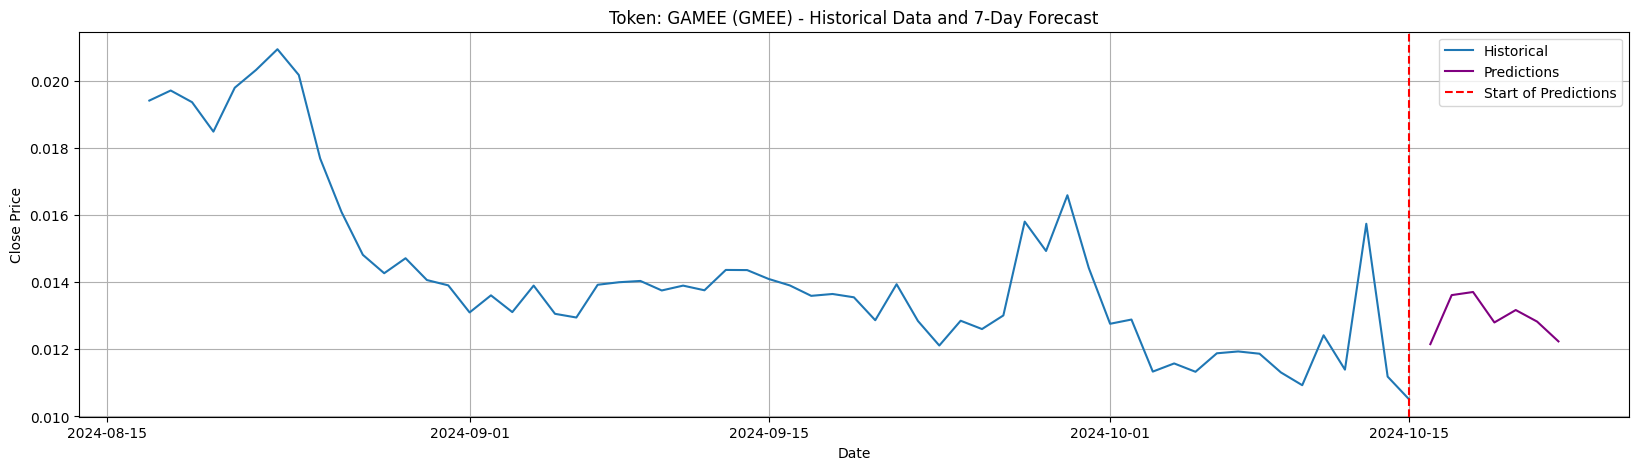

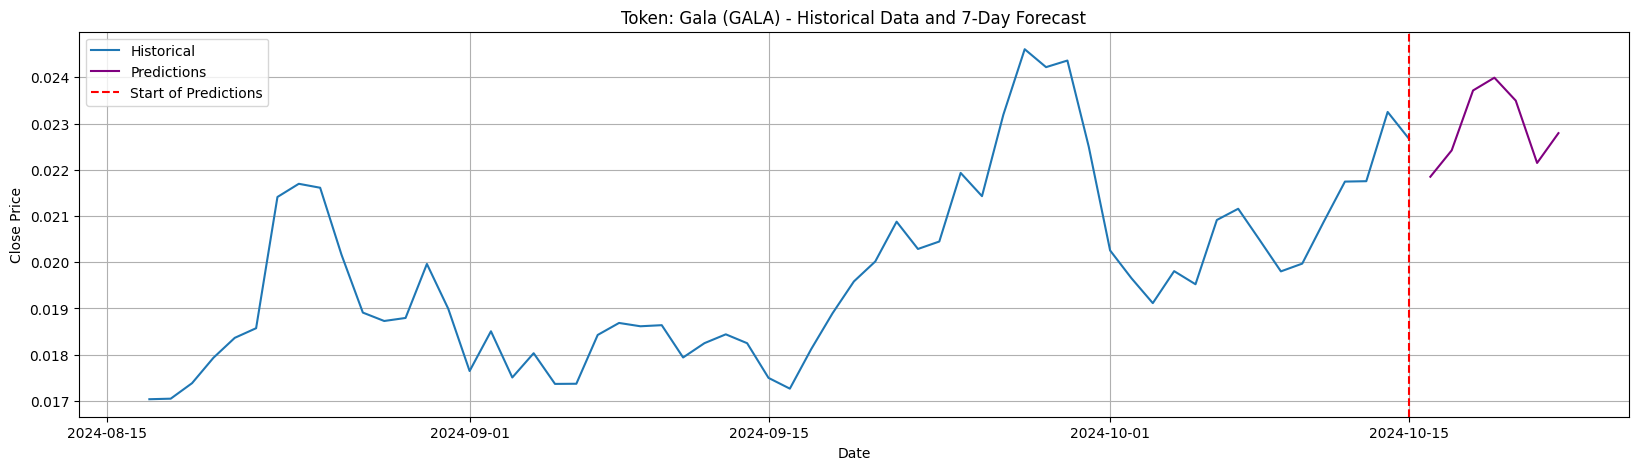

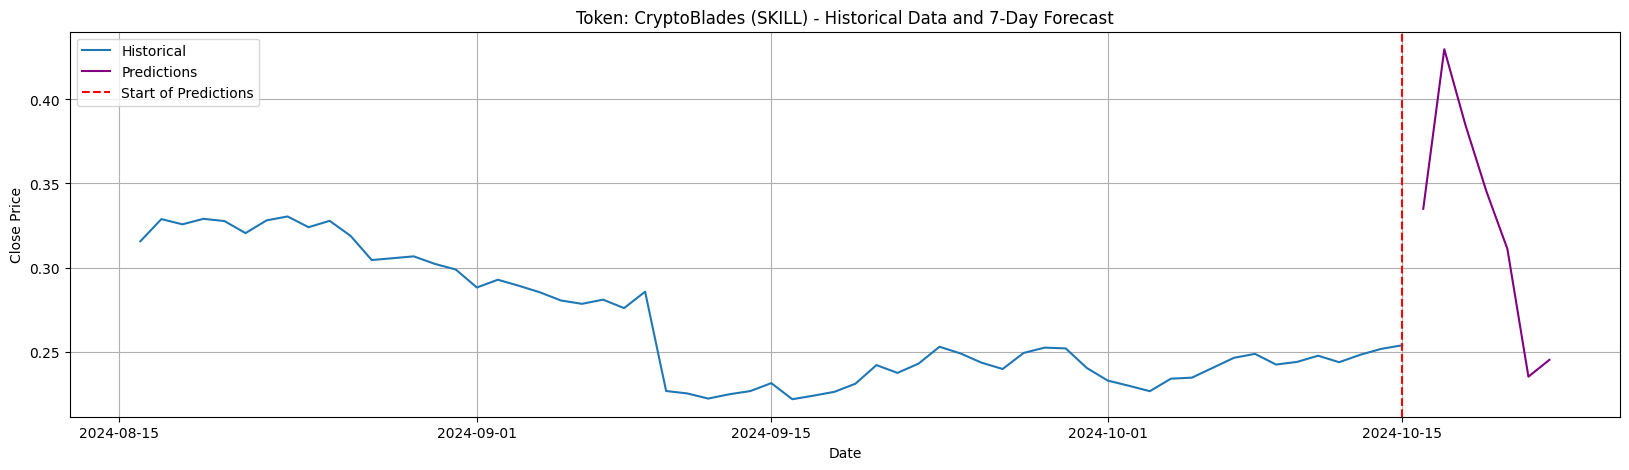

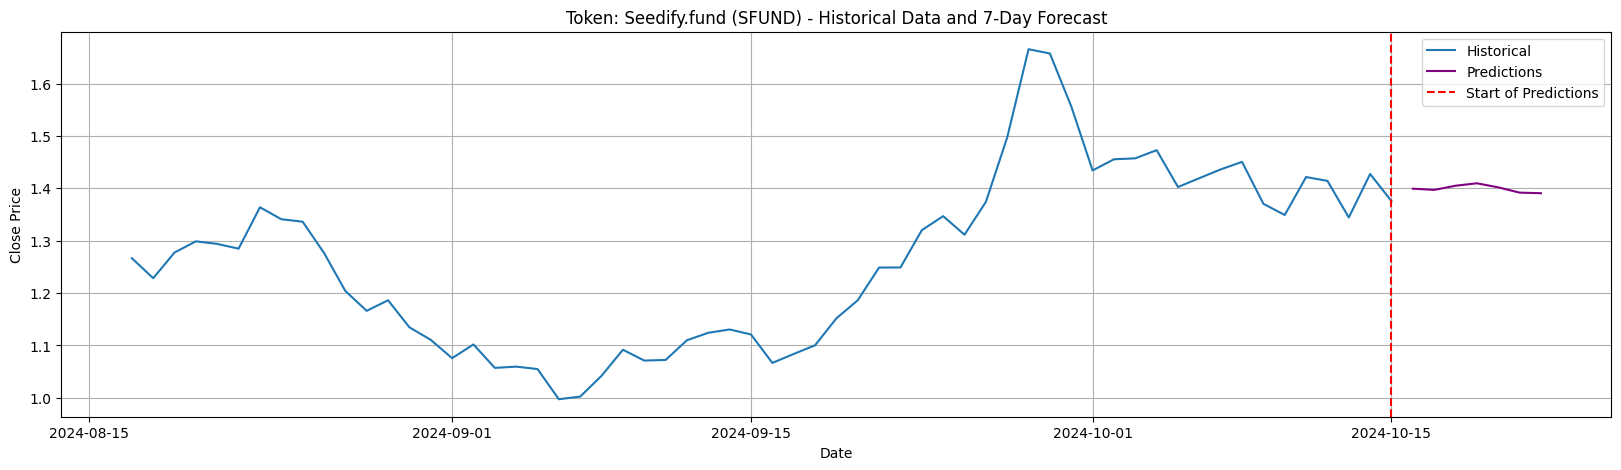

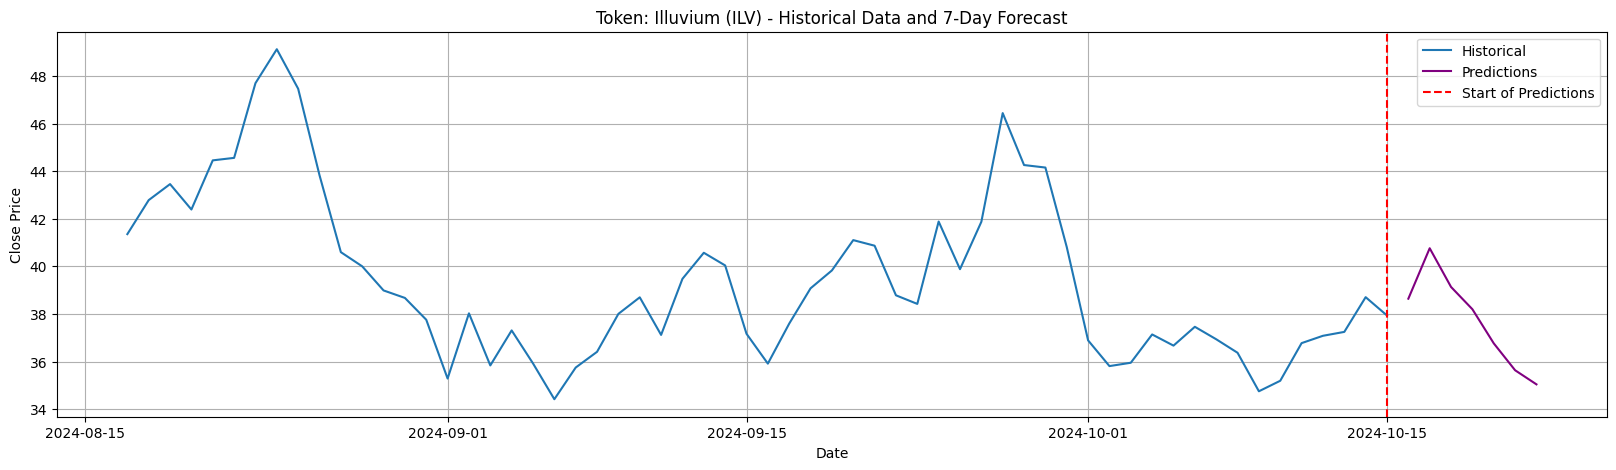

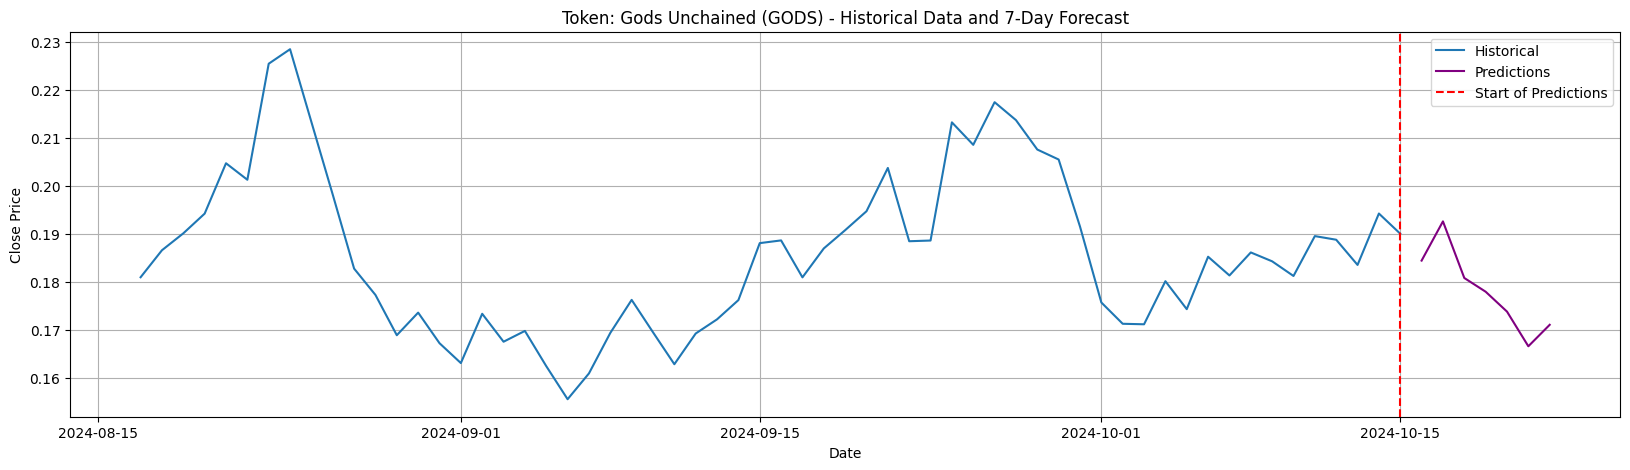

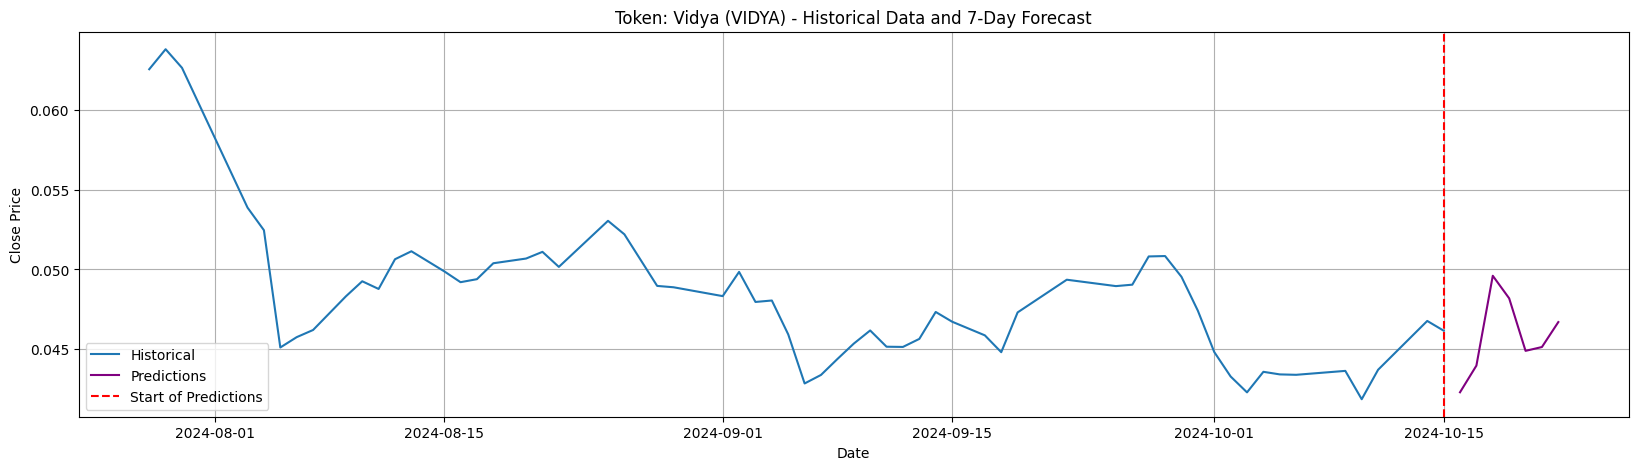

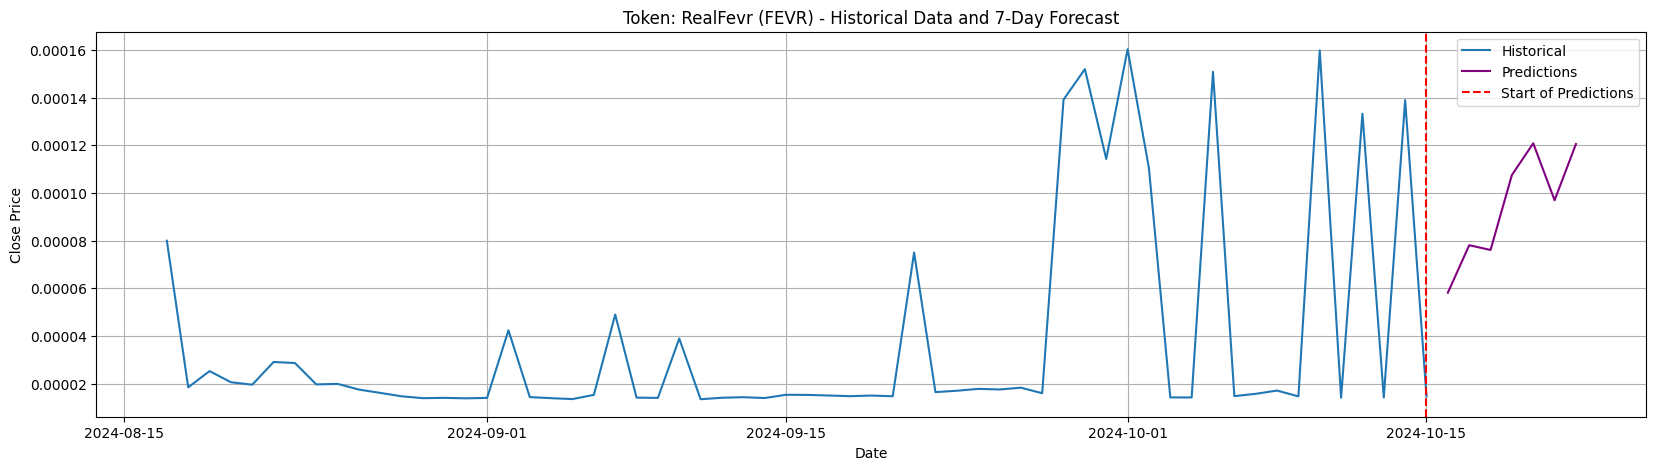

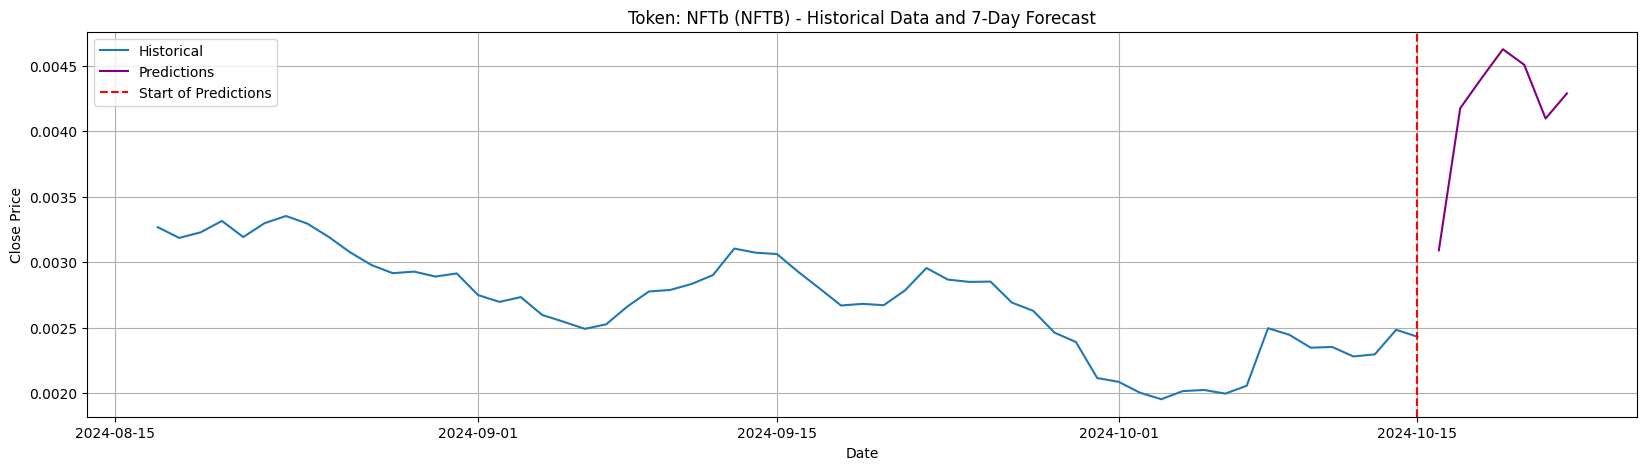

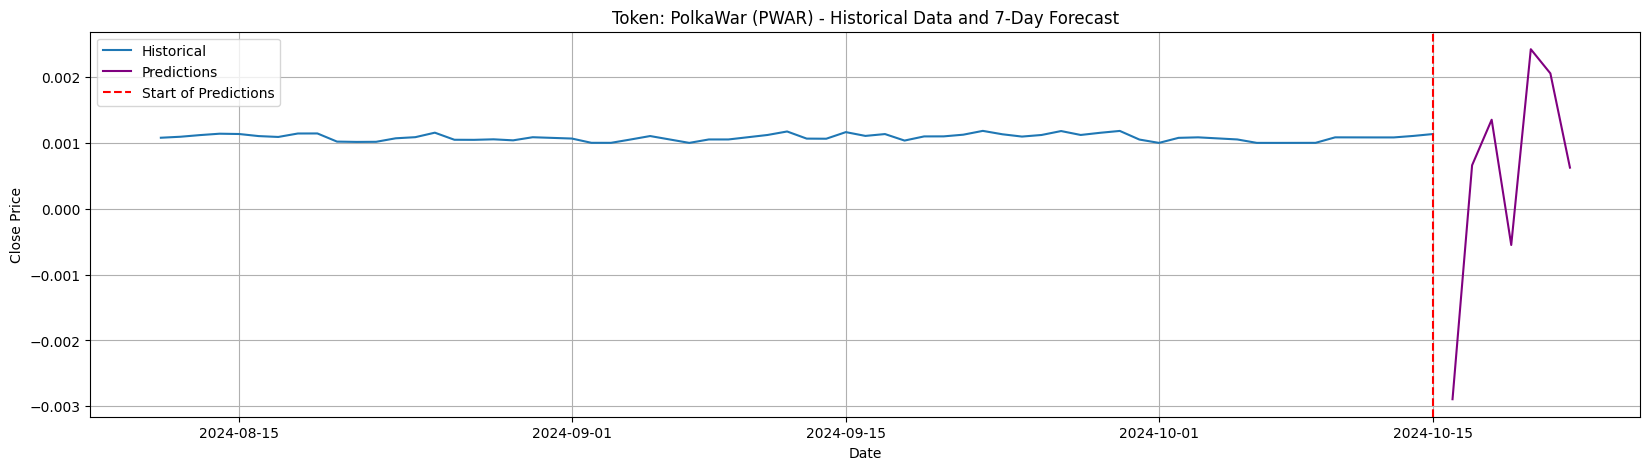

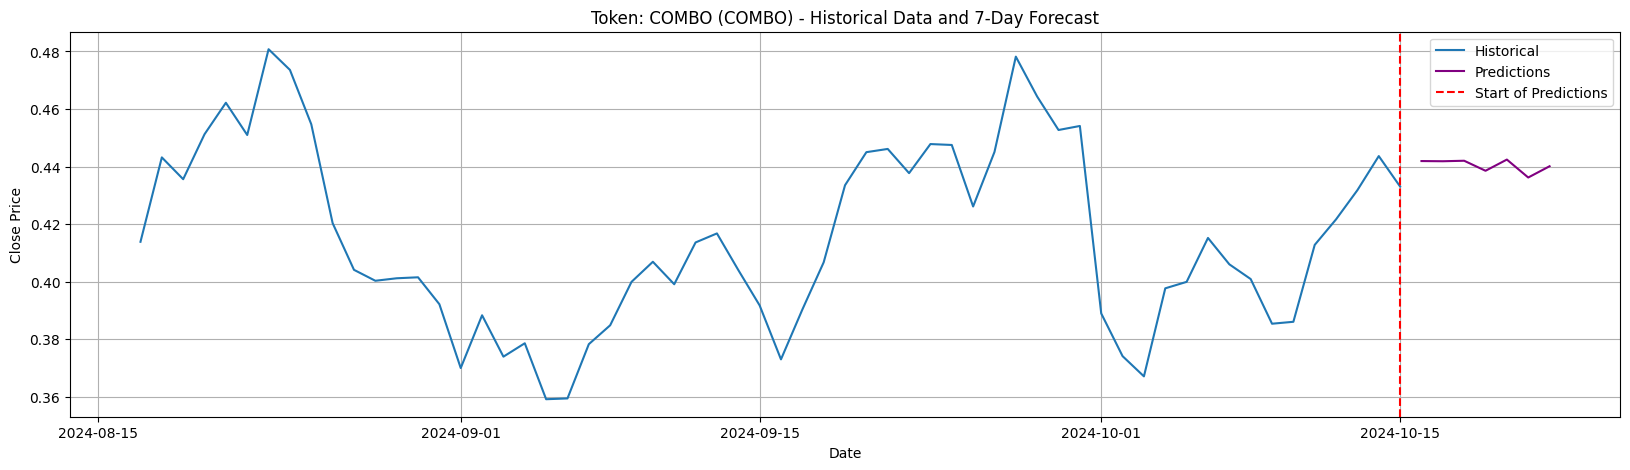

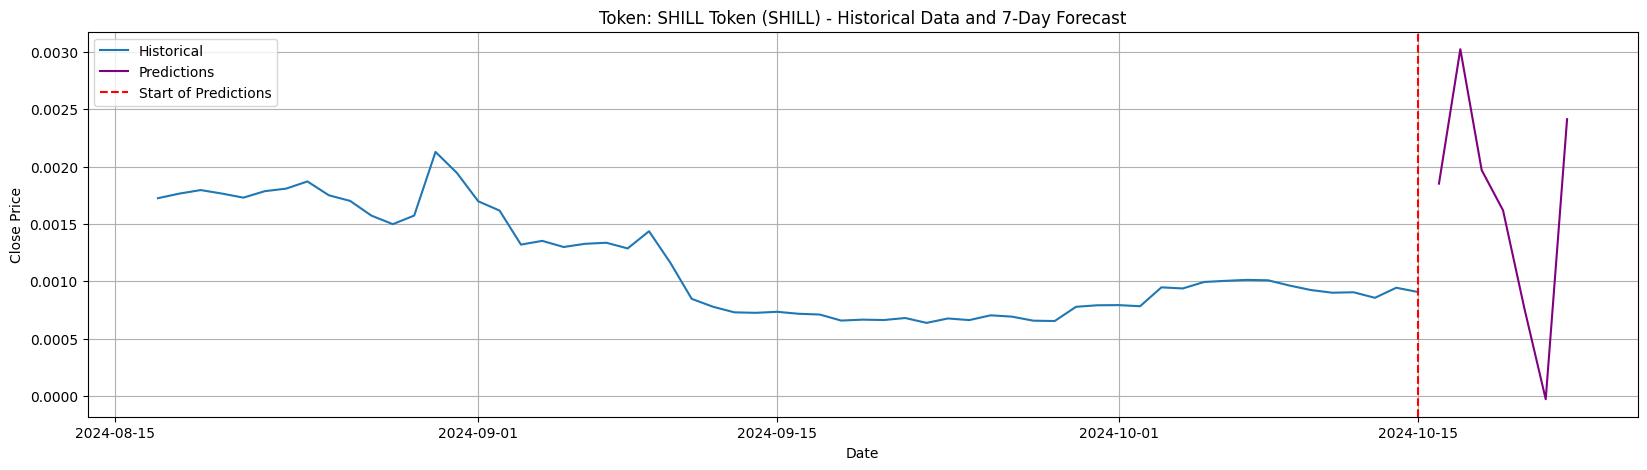

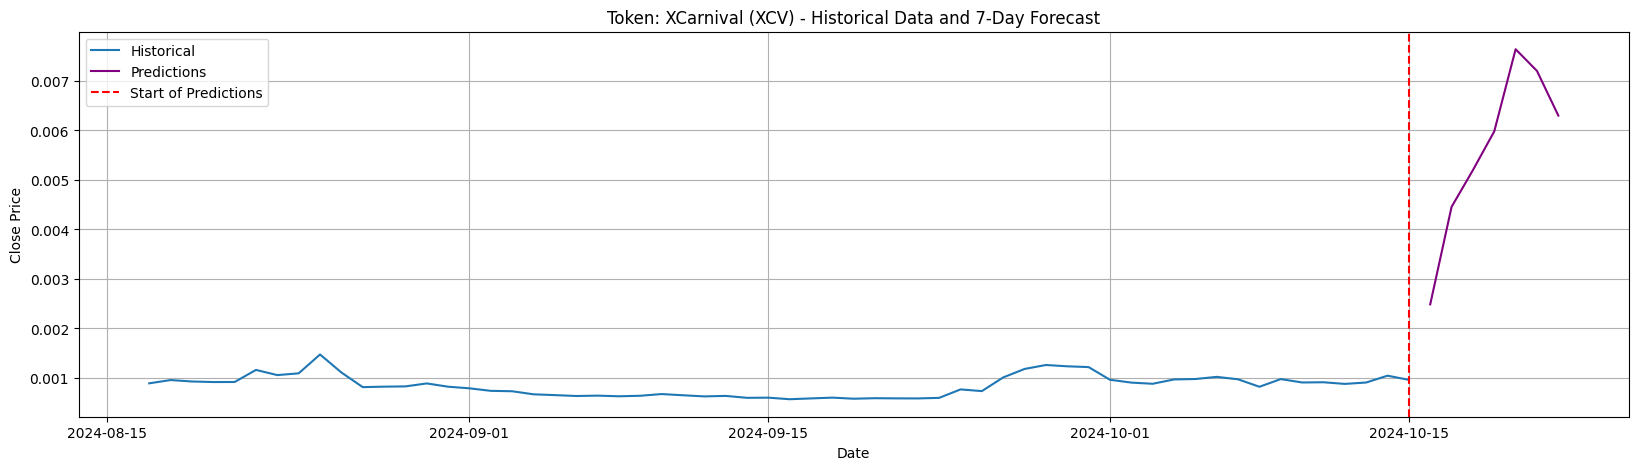

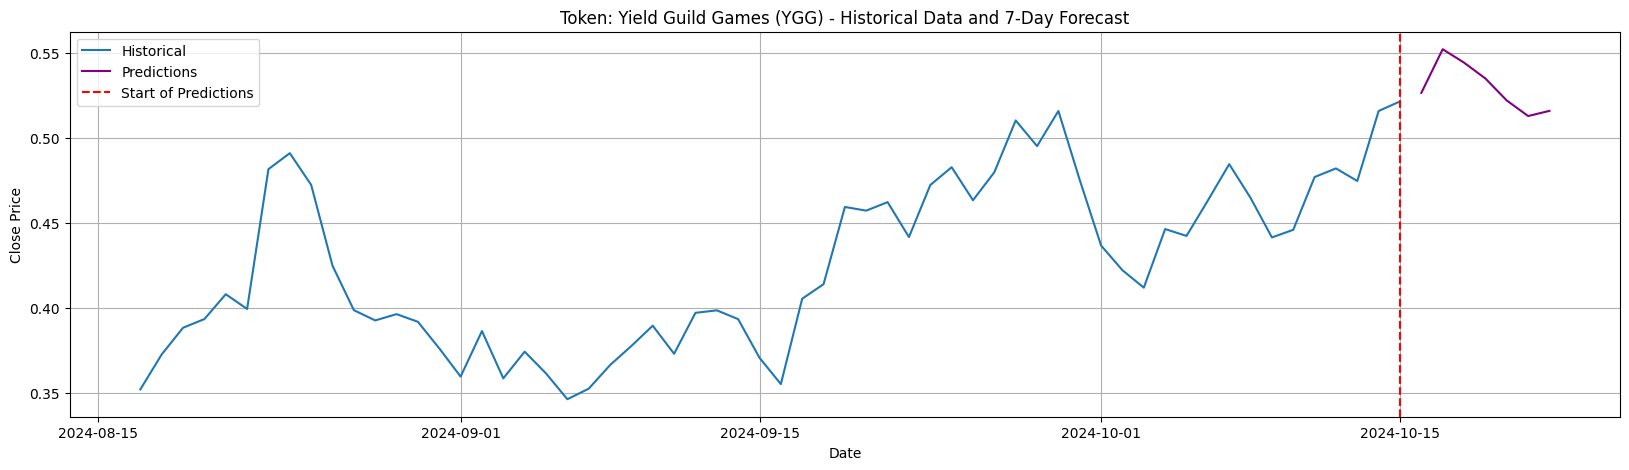

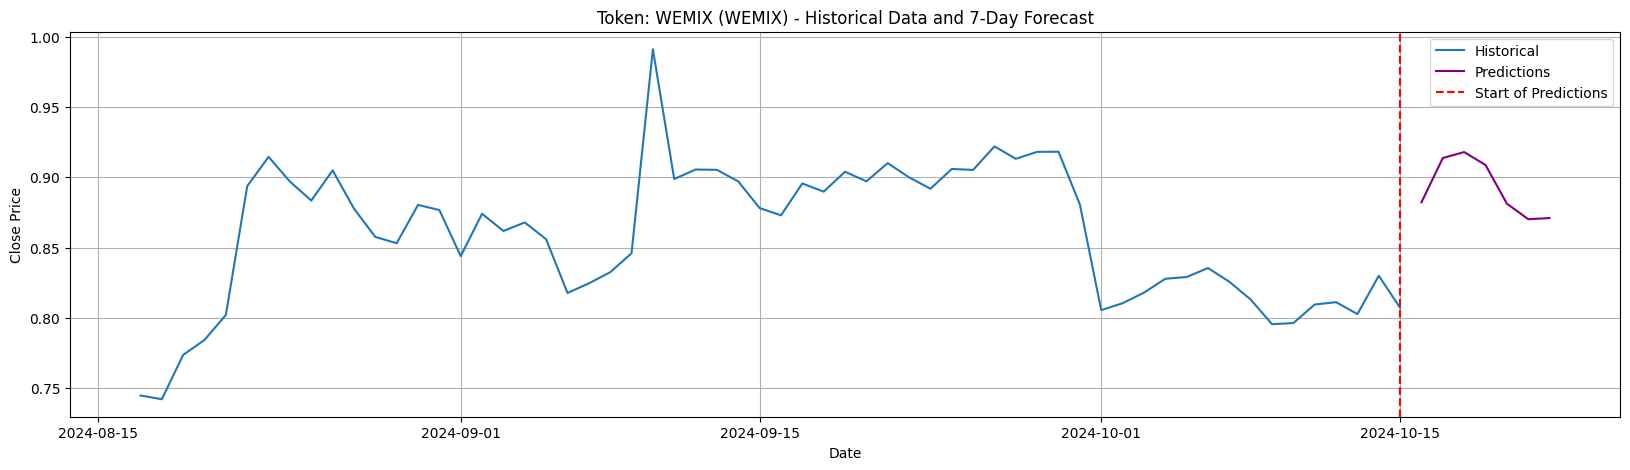

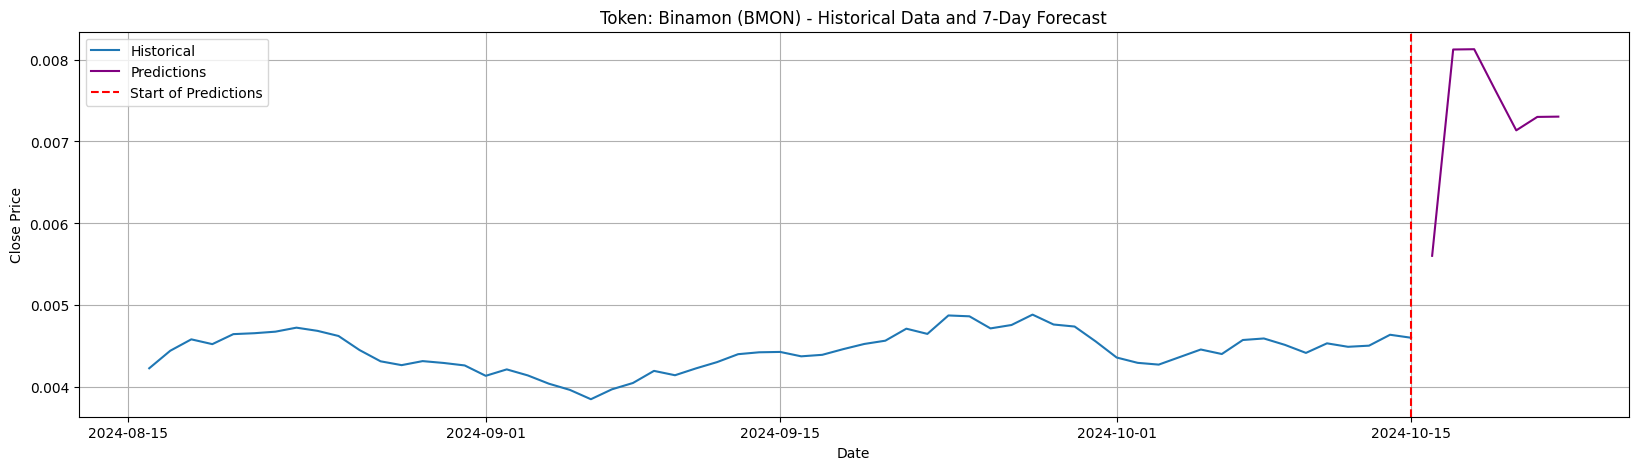

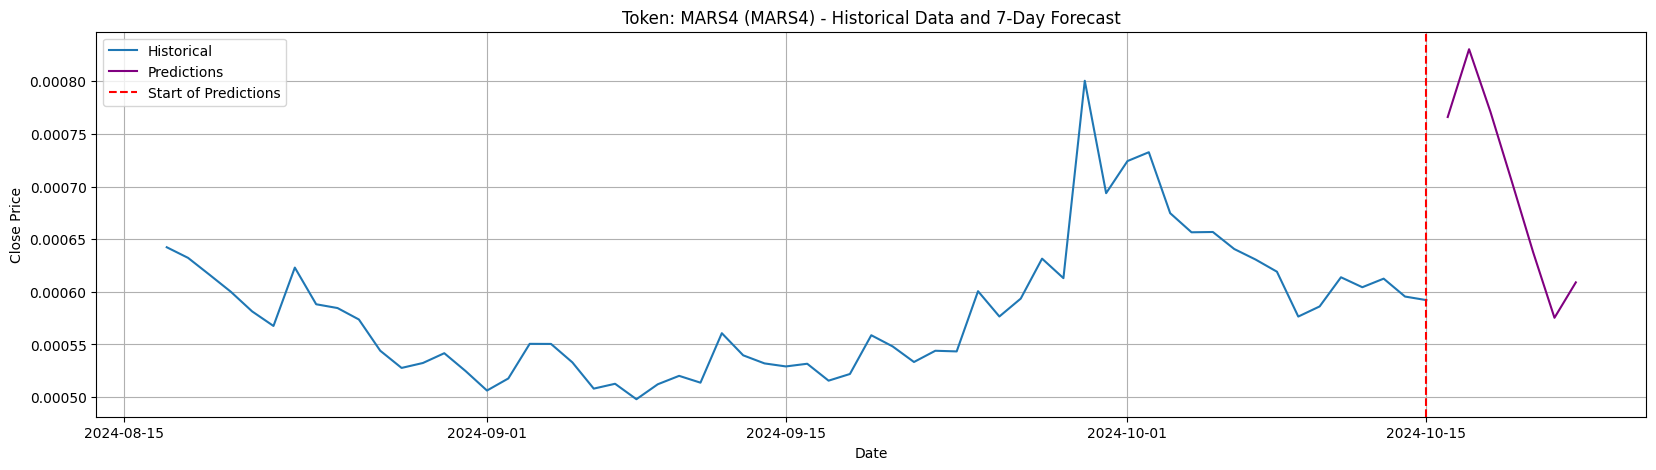

In [26]:
u.plot_predictions_only(train_data=gaming_obj.og_train, predictions_x_days=gaming_obj.og_pred, last_data_points=60)

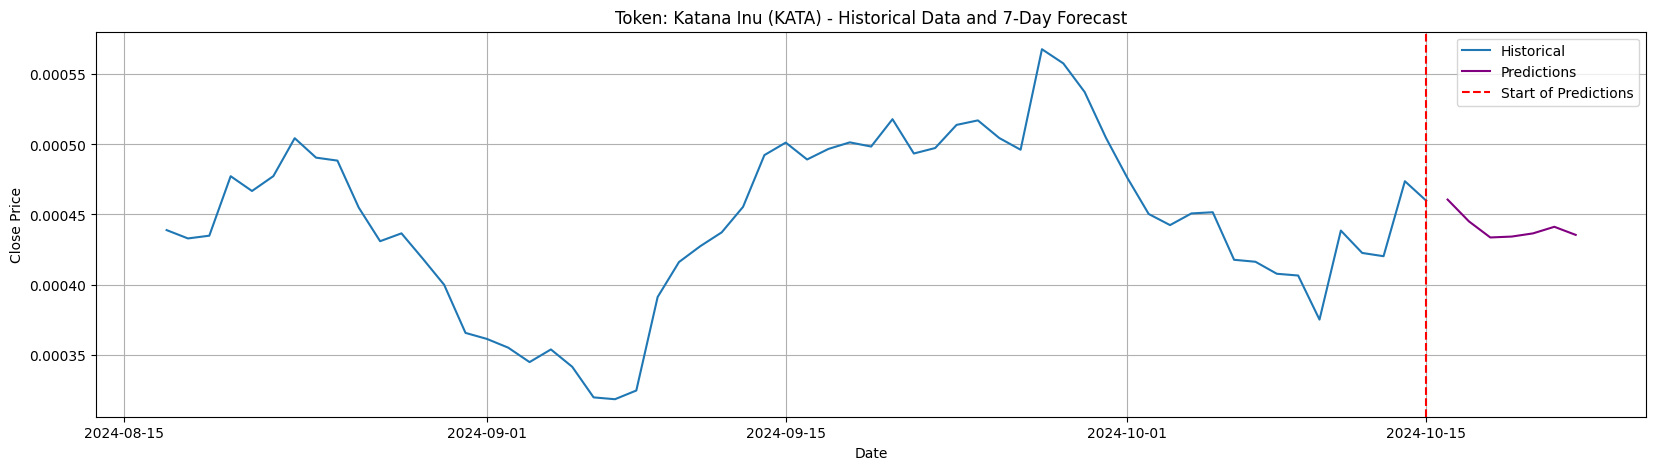

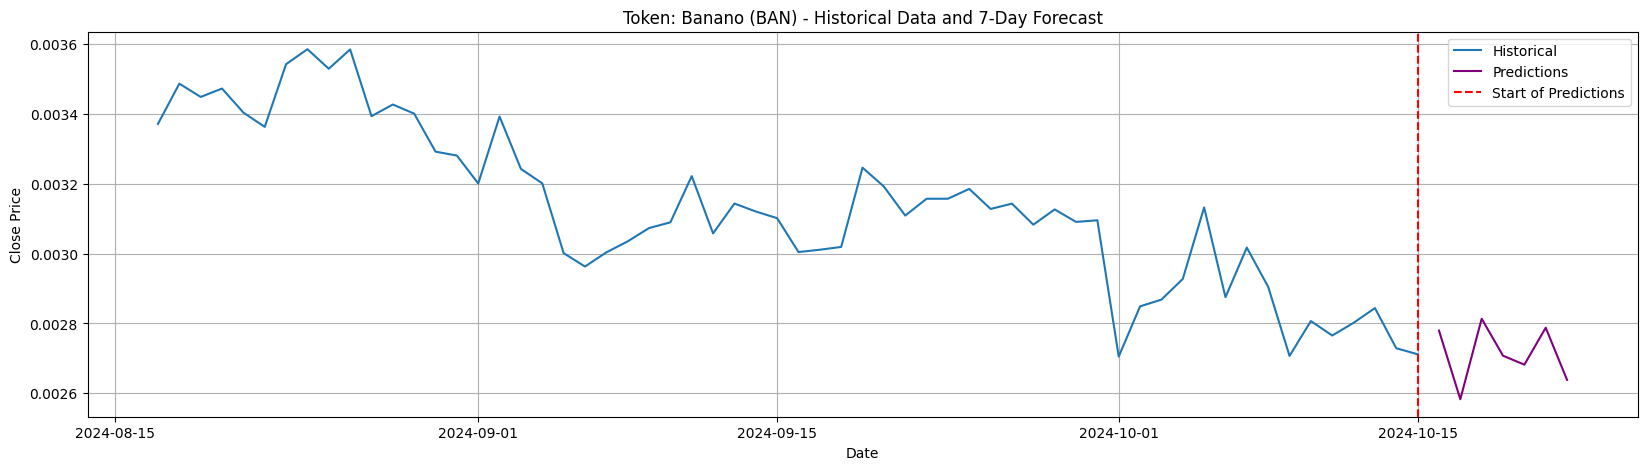

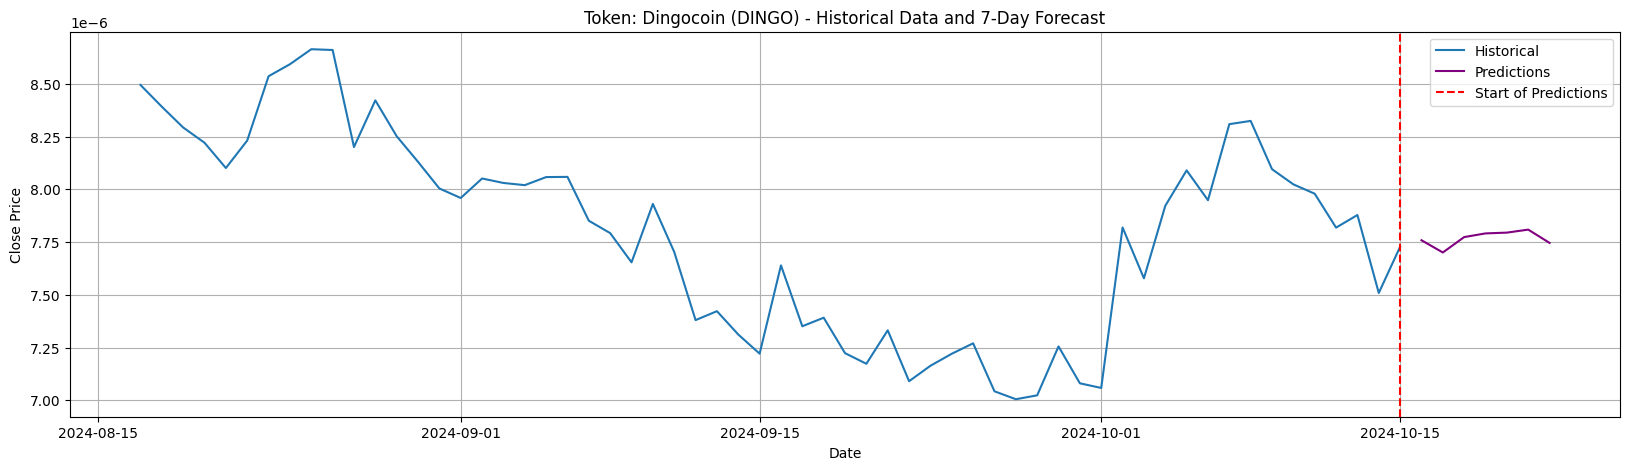

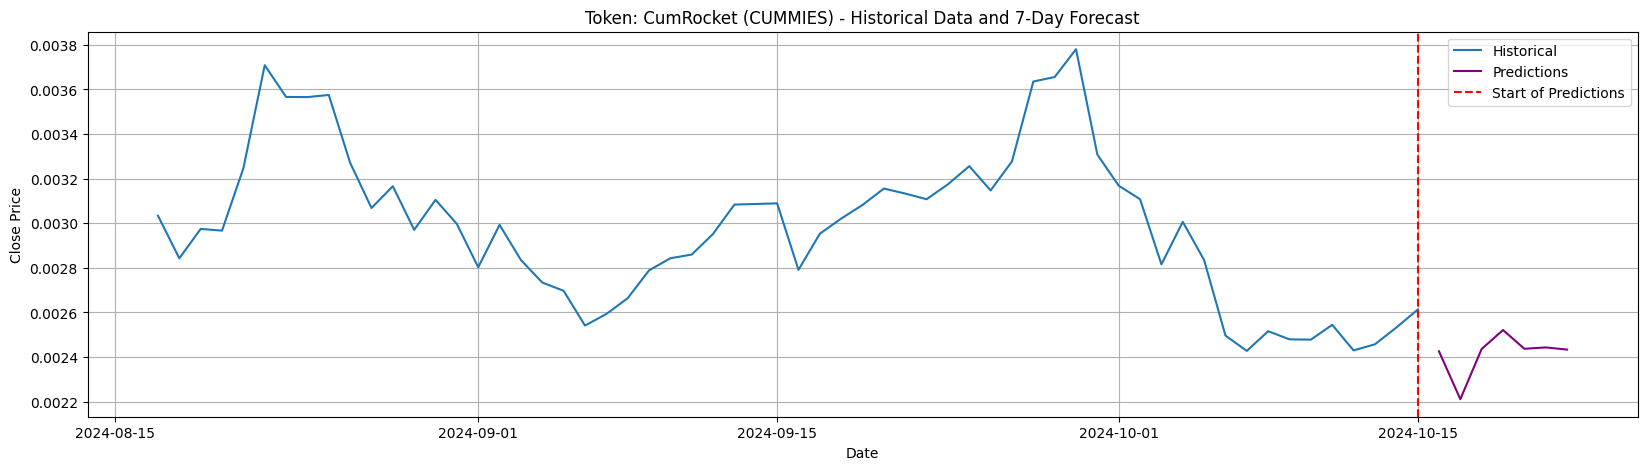

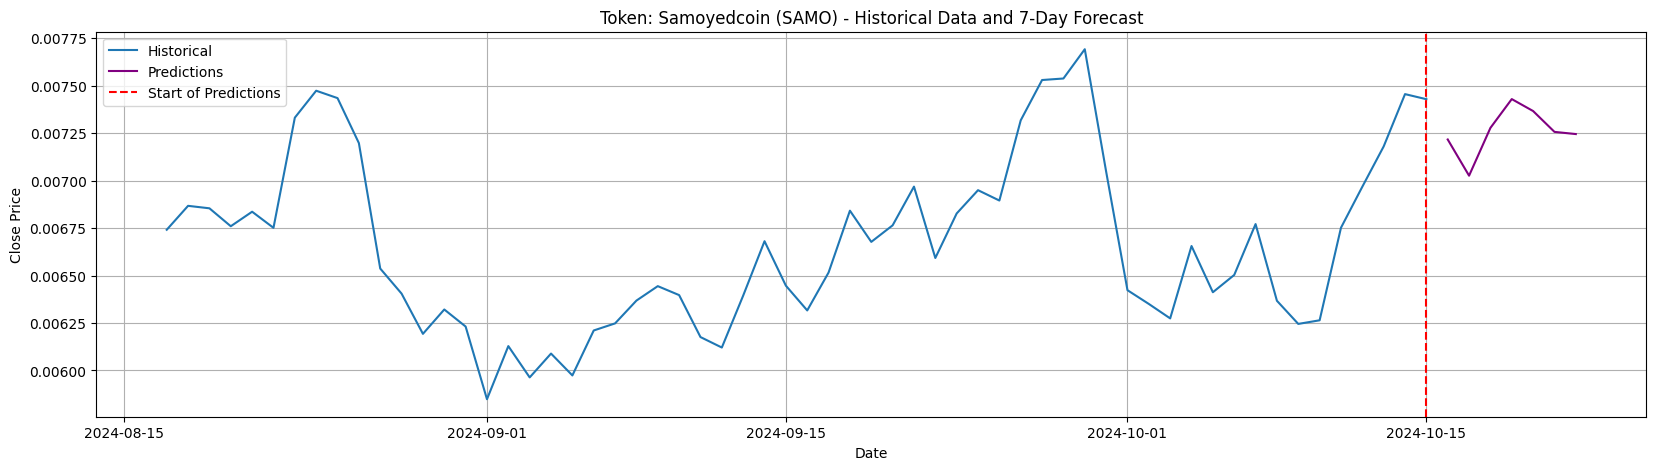

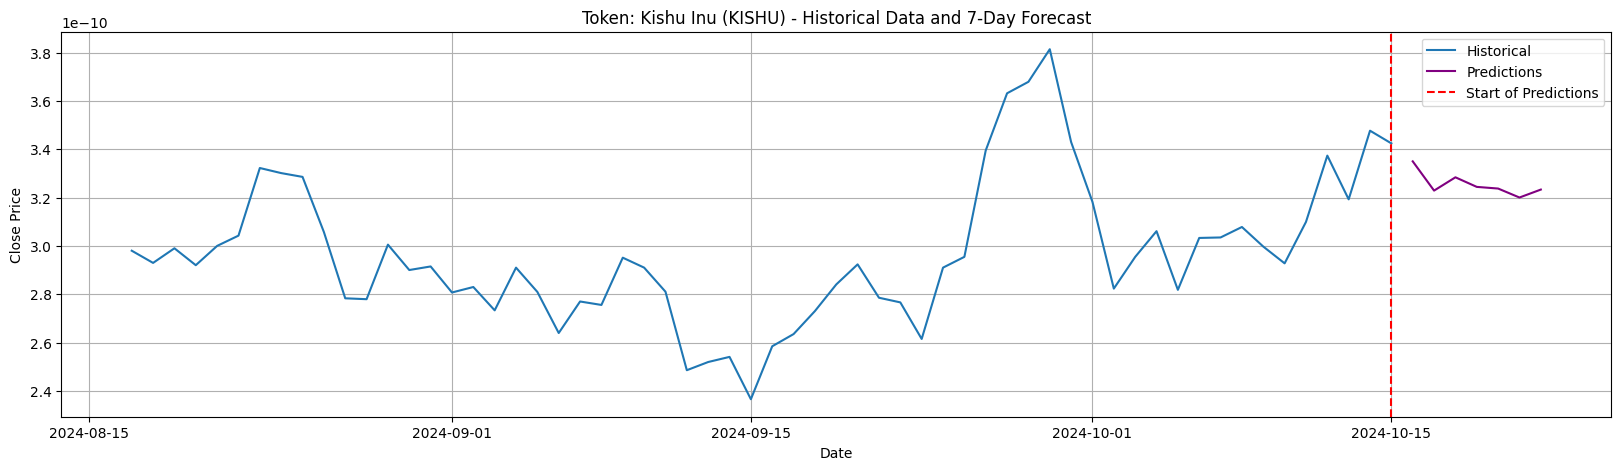

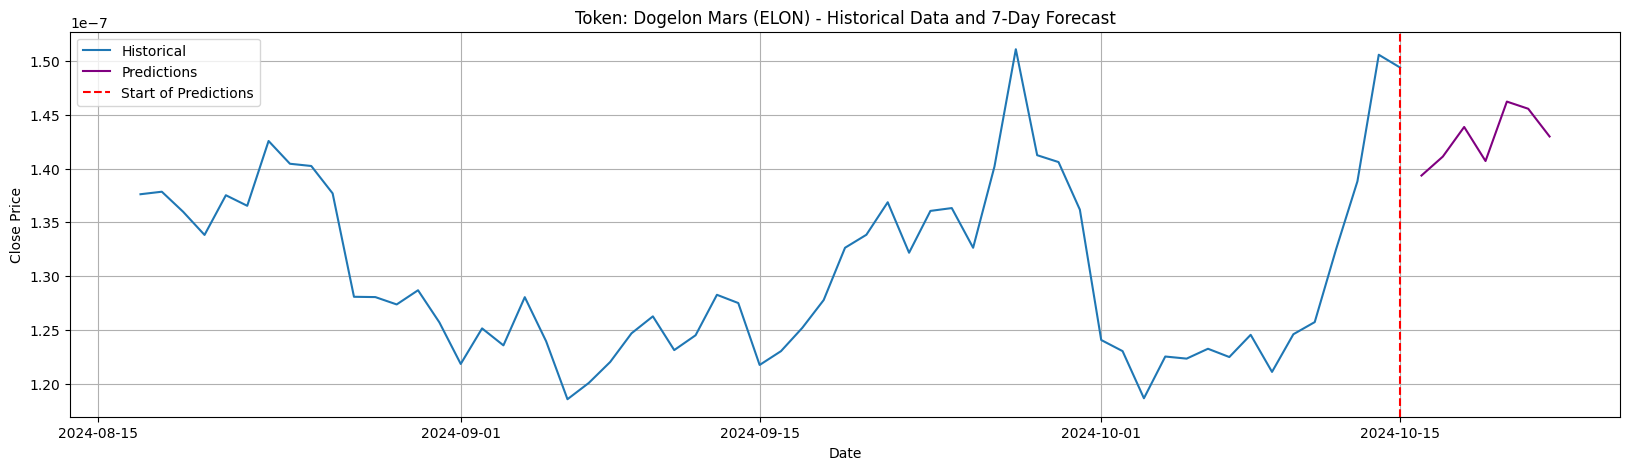

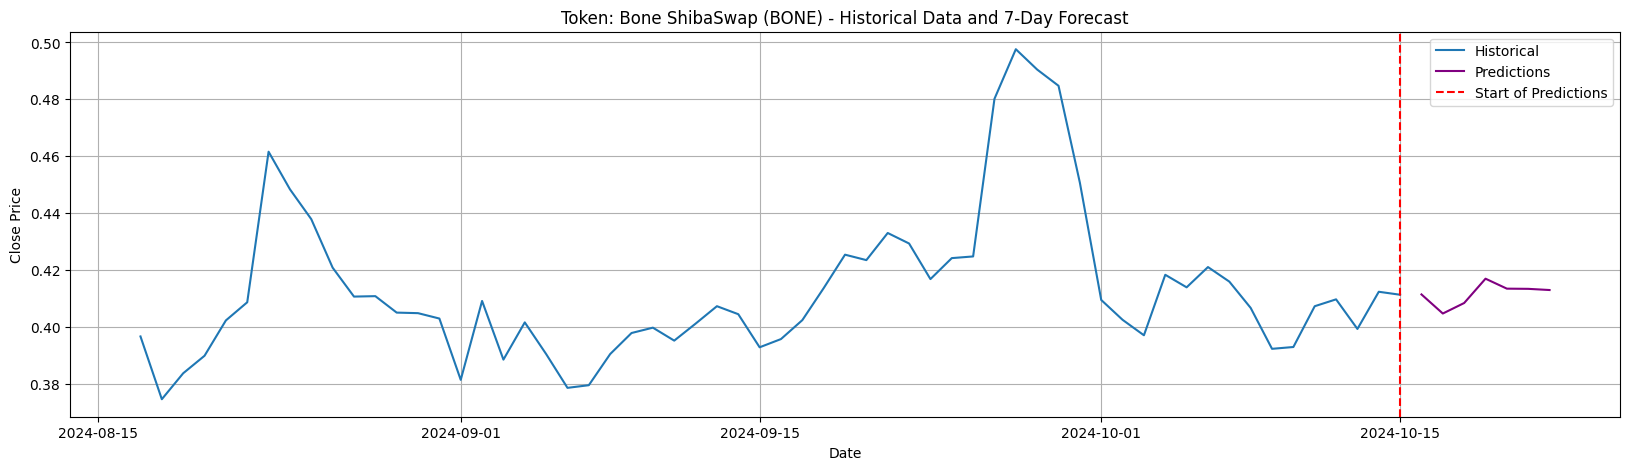

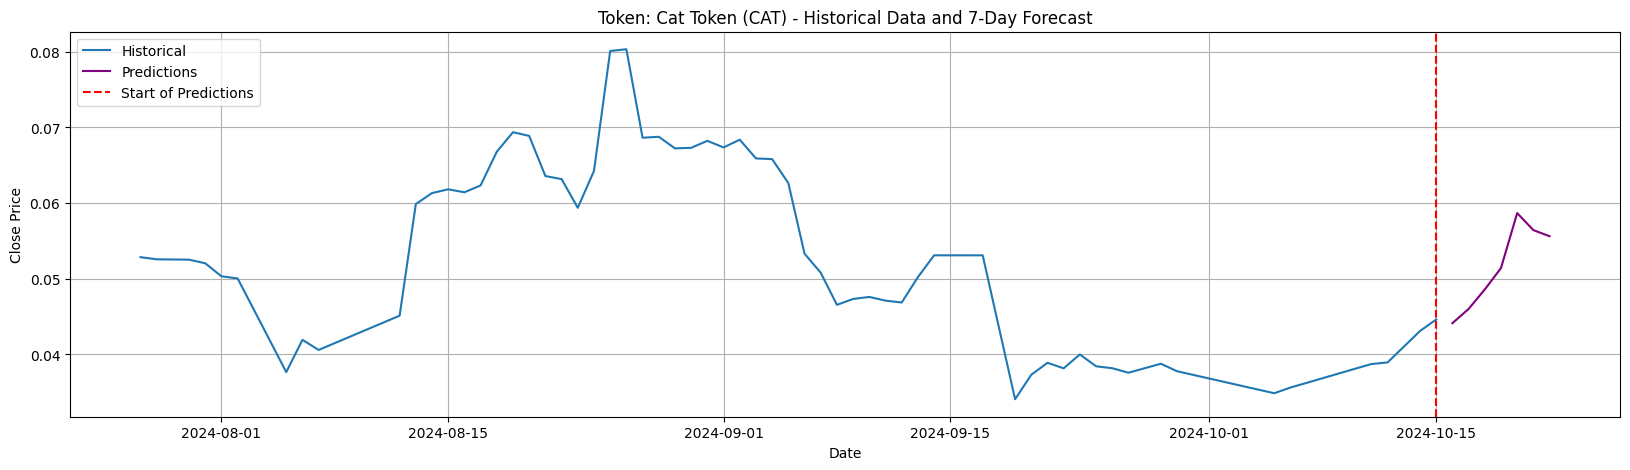

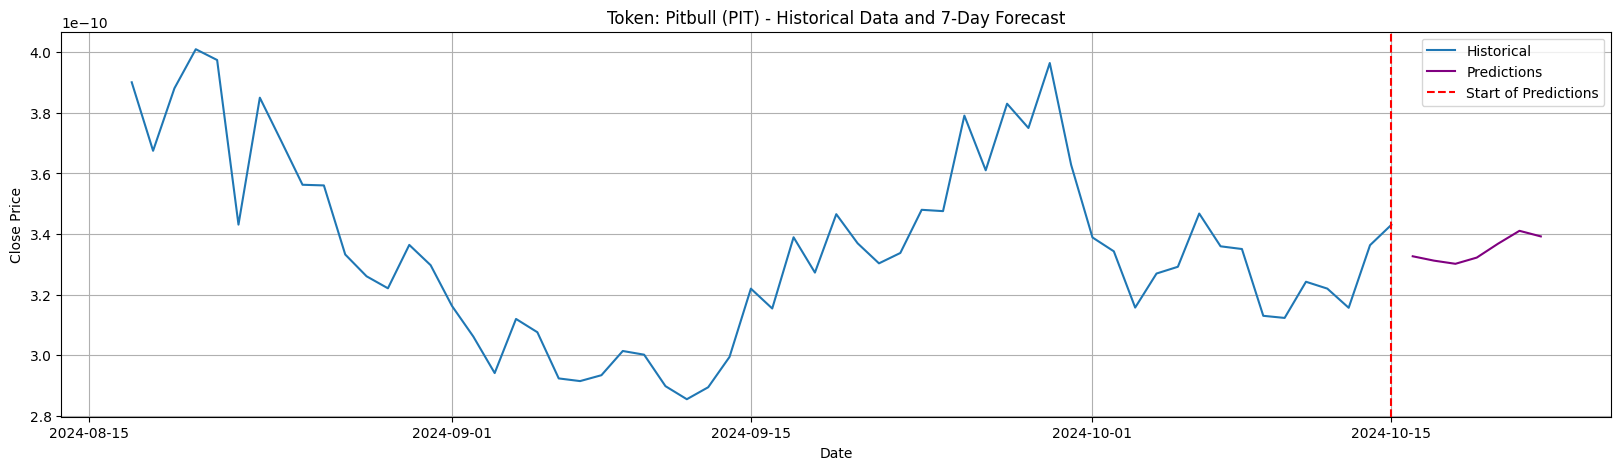

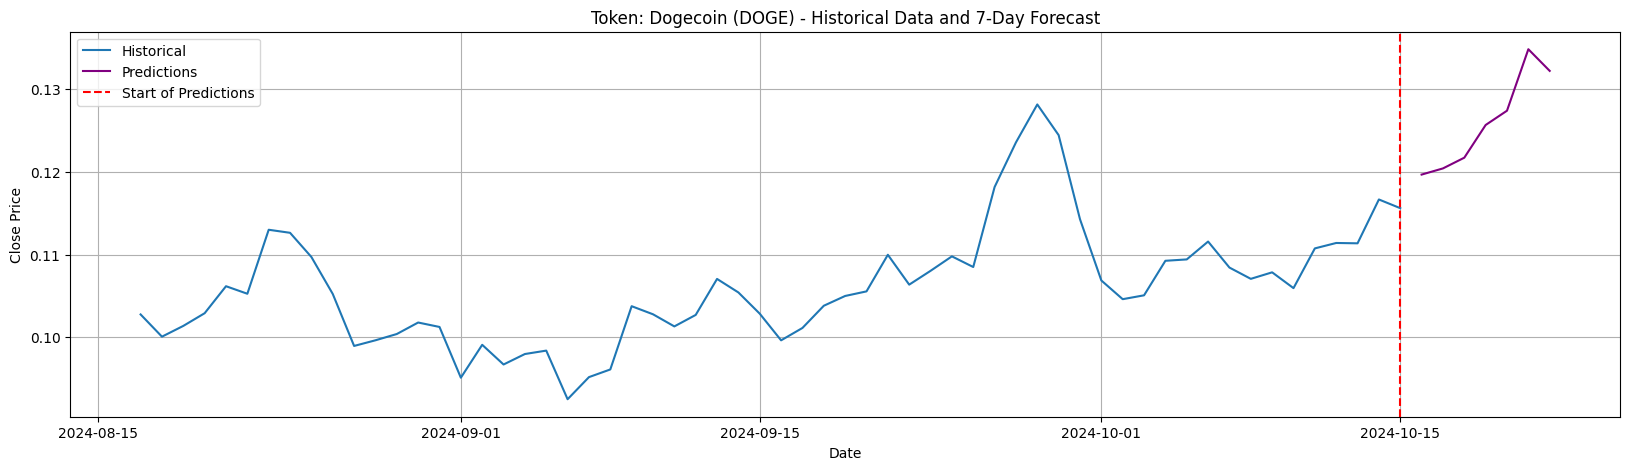

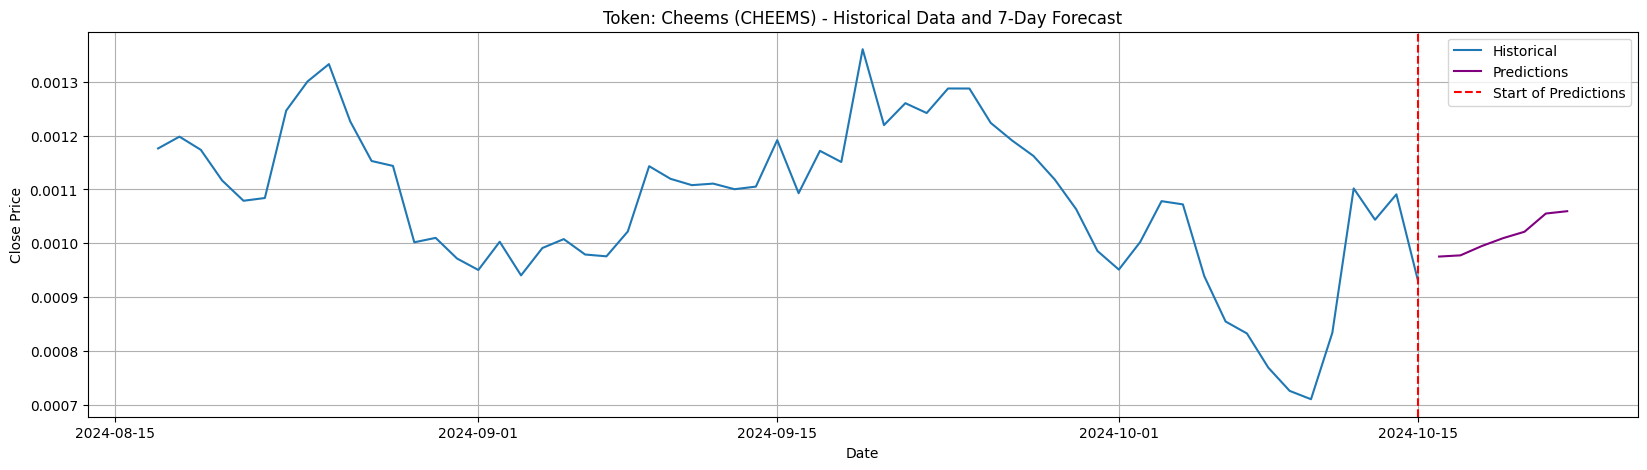

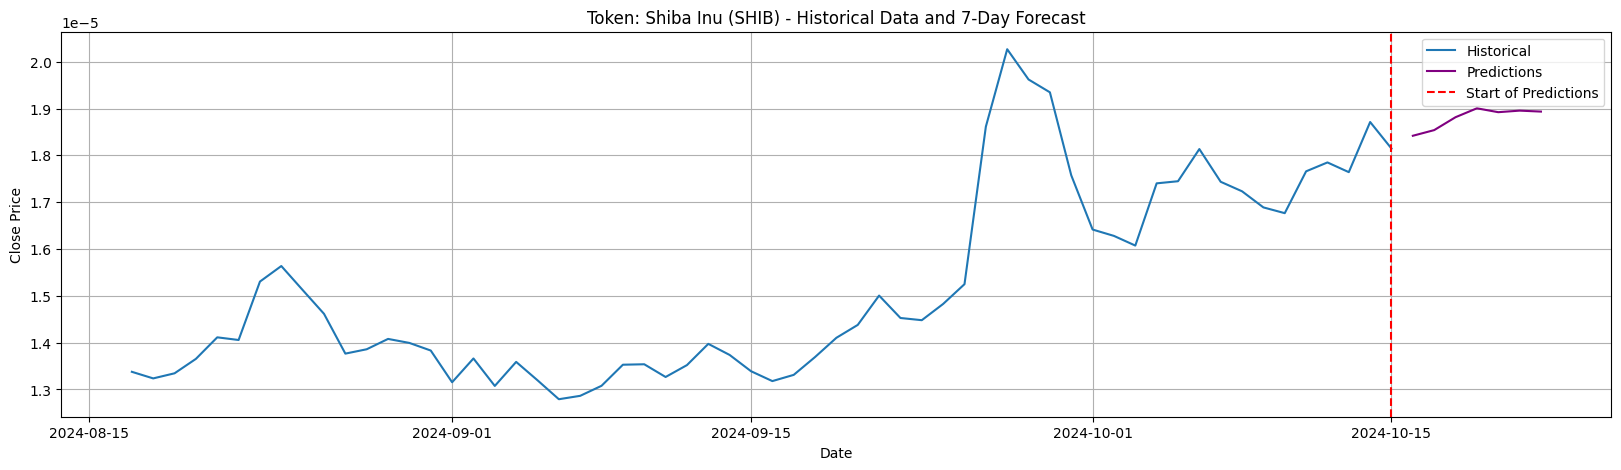

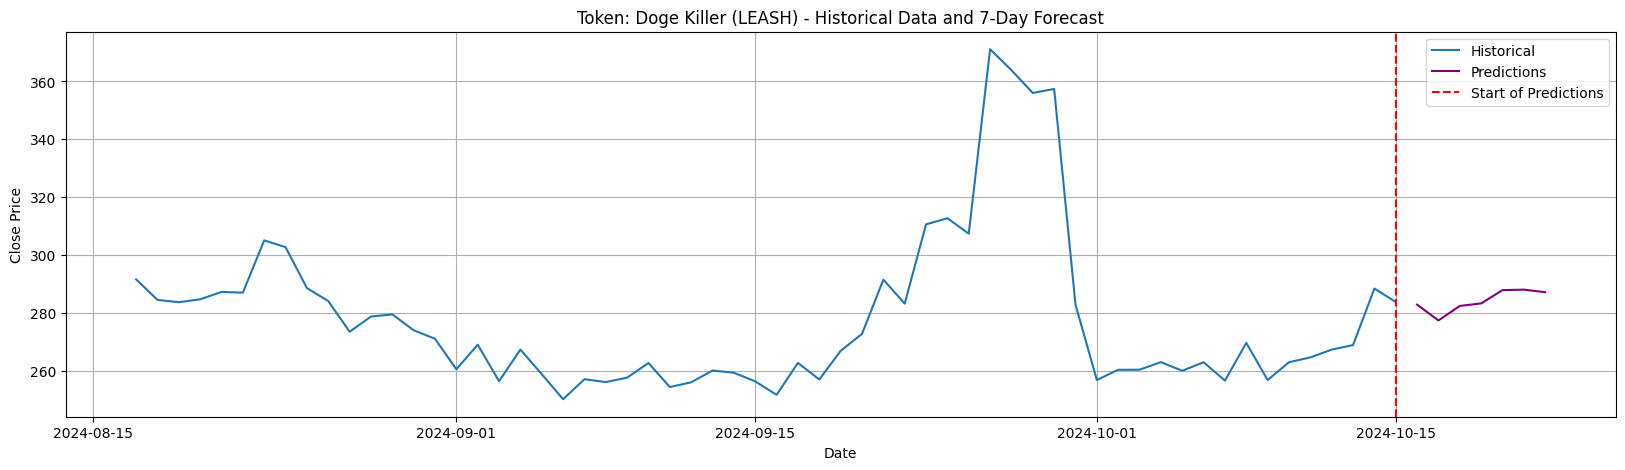

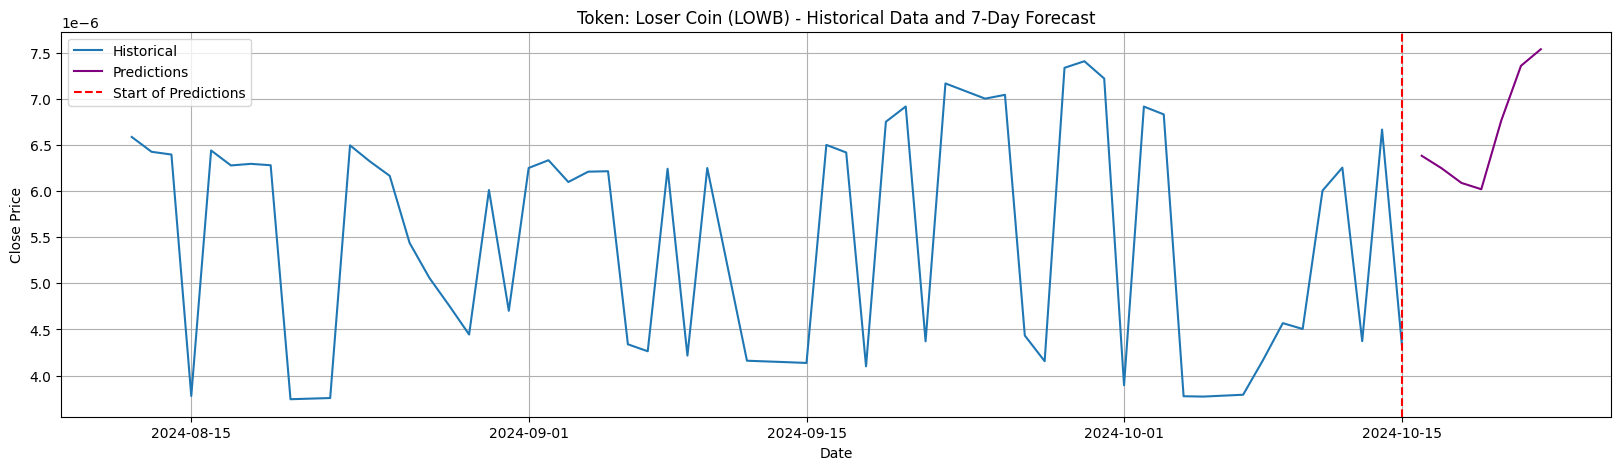

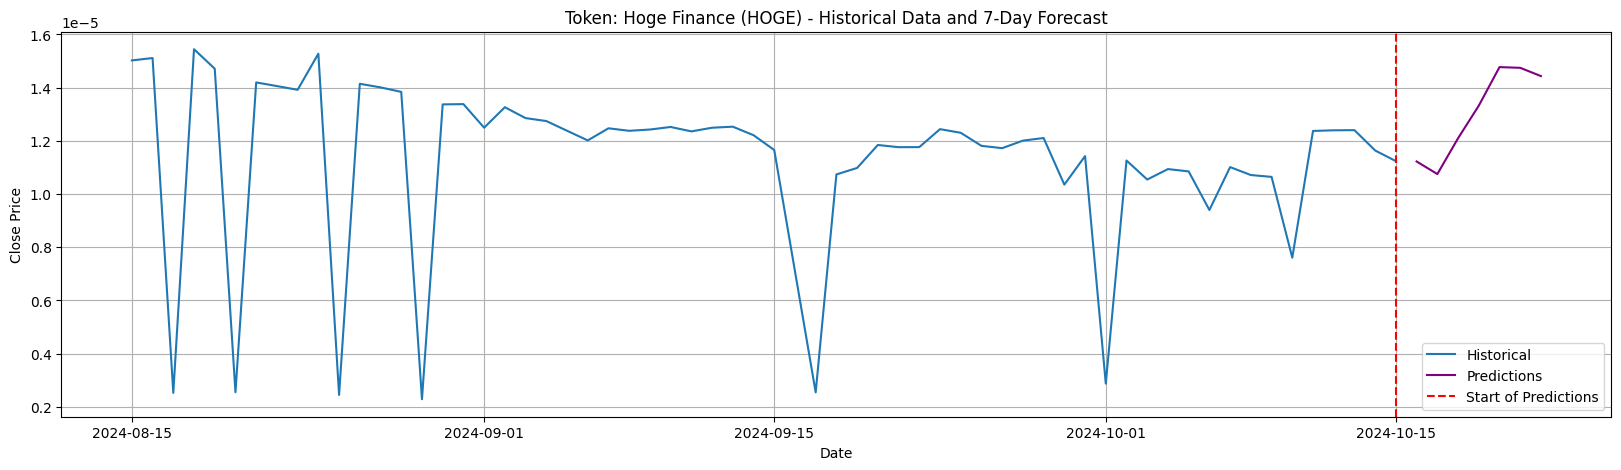

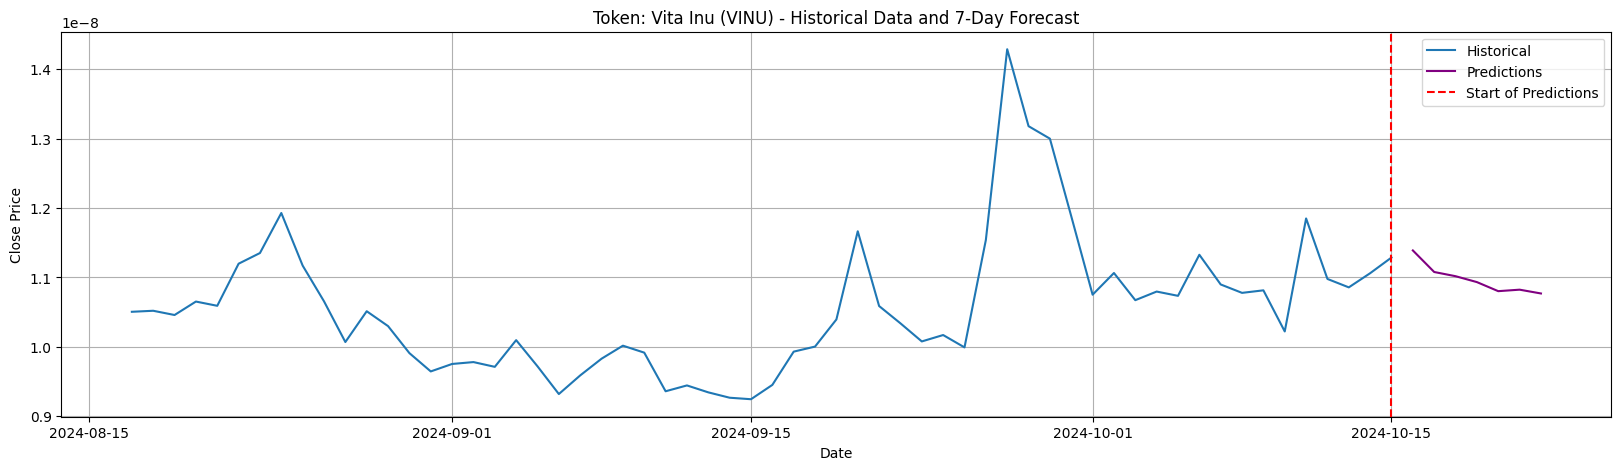

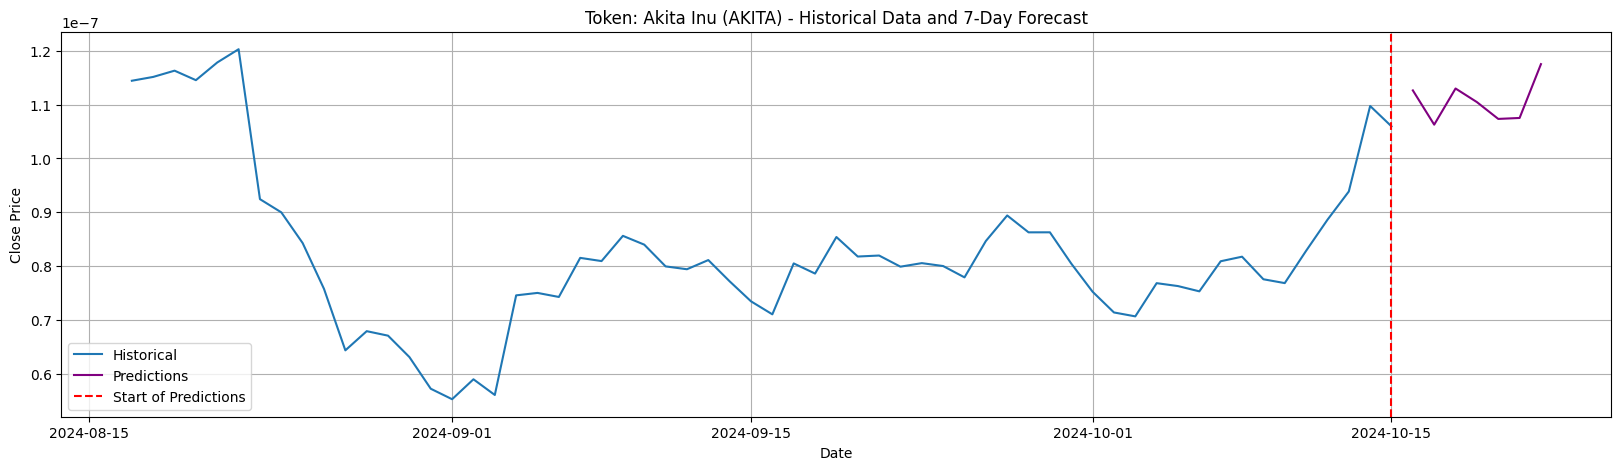

In [25]:
u.plot_predictions_only(train_data=meme_obj.og_train, predictions_x_days=meme_obj.og_pred, last_data_points=60)